# In-Vehicle Coupon Recommendation

### **Overview**
The dataset contain **25** feature **(categorical)** describe different driving scenarios and class target **'Y'** which consistent of **(1,0)**
<br>
<br>
The data is supervised, the goal of using this data to predict whether the driver will accept (consume) the coupon or not **(accept take value (1) and not accept take value (0))**, can identify the driver accept or reject the coupon based on the features.
<br>
<br>
**First:**
<br>
Need to conduct ***data exploration*** to determine which features depend on whether a coupon is accepted or not.

**Second:**
<br>
Need to build a model to classify the driver will accept the coupon or not, So use ***SVM for classification*** help to predict Whether or not to accept the coupon.


### **Description of the dataset**
The dataset consists of **12684 records** and **26 features**, most of the features are categorical and some attributes are numeric categorical type.
<br>

There are some feature already have been encoded into 0 and 1.

**Variable Name and Description:**
<br>
<br>
> **Driver  attributes:**
<br>
<br>
**1. Gender:** Female, Male
<br>
**2. Age:** 21, 46, 26, 31, 41, 50plus, 36, below21
<br>
**3. Marital Status:** Unmarried partner, Single, Married partner, Divorced, Widowed
<br>
**4. has_Children:** *(already encoded)* [**1:** has children, **0:** No children]
<br>
**5. Education:** Some college-no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
<br>
**6. Occupation:**  Unemployed, Architecture&Engineering, Student,
Education&Training&Library, Healthcare Support,...etc
<br>
**7. Income:** 37500-49999, 62500-74999, 12500-24999, 75000-87499, 50000-62499, 25000-37499, 100000 or More, 87500-99999, Less than 12500 in dolloars.
<br>
**8. Car:** Description of vehicle which driven by user *(Scooter and motorcycle, crossover, Mazda5)*
<br>
**9. Bar:** how many times do you go to a bar every month? *(never, less1, 1 ~ 3, gt8, nan4~8)*
<br>
**10. CoffeeHouse:** how many times do you go to a coffeehouse every month?
 *(never, less1, 1 ~ 3, 1 ~ 3, gt8, nan)*
<br>
**11. CarryAway:** how many times do you get take-away food every month? *(n4 ~ 8, 1 ~ 3, gt8, less1, never)*
<br>
**12. RestaurantLessThan20:** feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month? *(4 ~ 8, 1 ~ 3, less1, gt8, never)*
<br>
**13. Restaurant20To50:** how many times do you go to a restaurant with average expense per person of 20-50 in dollars every month? *(1 ~ 3, less1, never, gt8, 4 ~ 8, nan)*

<br>
<br>


>**Contextual attributes:**
<br>
<br>
**1.Destination:** No Urgent Place, Home, Work<br>
**2.Passenger:** Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
<br>
**3.Weather:** Sunny, Rainy, Snowy
<br>
**4.Temperature:** 55, 80, 30
<br>
**5.Time:** 2PM, 10AM, 6PM, 7AM, 10PM
<br>
**6.toCoupon_GEQ5min:** driving distance to the restaurant/bar for using the coupon is greater than **5** minutes
<br>
**7.toCoupon_GEQ15min:** driving distance to the restaurant/bar for using the coupon is greater than **15** minutes
<br>
**8.toCoupon_GEQ25min:** driving distance to the restaurant/bar for using the coupon is greater than **25** minutes
<br>
**9.direction_same:**  *(already encoded)* whether the restaurant/bar is in the same direction as your current destination **0, 1**
<br>
**10.direction_opp:** *(already encoded)* whether the restaurant/bar is in the same direction as your current destination **1, 0**  

<br>
<br>

> **Coupon attributes:**
<br>
<br>
**1. Coupon:** Restaurant(<20) dolloar, Coffee House, Carry out & Take away, Bar, Restaurant(20-50) in dolloars
<br>
**2. Expiration:** coupon expires in 1 day or in 2 hours **(1d, 2h)**







# Reading the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('sample_data/vehicle-coupon.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
data.shape

(12684, 26)

# Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

> Most of the features are categorical or encoded categorical. and some of the features contain missing features which will be handled later.


In [ ]:
data['Y'].unique()

array([1, 0])

In [ ]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

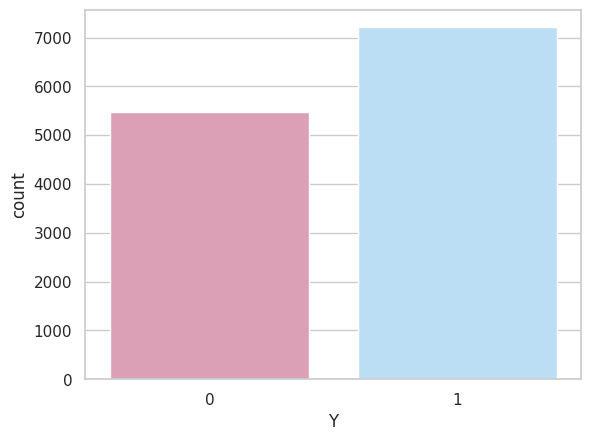

In [ ]:
sns.countplot(data=data, x="Y",palette=['#e595b4','#b2e0ff']);

> The target class is **relatively Balanced**

* **check duplicate**

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(12610, 26)

> The data had some duplicate records

* **Check missing values**

In [ ]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

* **Droping features with more than 70% missing values**

In [ ]:
null_percentage = data.isnull().sum() / len(data)
features_to_drop = null_percentage[null_percentage > 0.7].index
data.drop(columns=features_to_drop, inplace=True)

In [ ]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

> One feature had beed dropped and there're still missing values needed to be handled

* **Filling the missing values with the mode of the feature**

In [ ]:
fill_null = ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]
for col in fill_null:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


* **Modify the The columns type as they are all categorical (not int)**

In [ ]:
for col in data.columns:
    data[col]=data[col].astype('object')

data.dtypes

destination             object
passanger               object
weather                 object
temperature             object
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children            object
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min        object
toCoupon_GEQ15min       object
toCoupon_GEQ25min       object
direction_same          object
direction_opp           object
Y                       object
dtype: object

* **Check the Distribution of each feature**

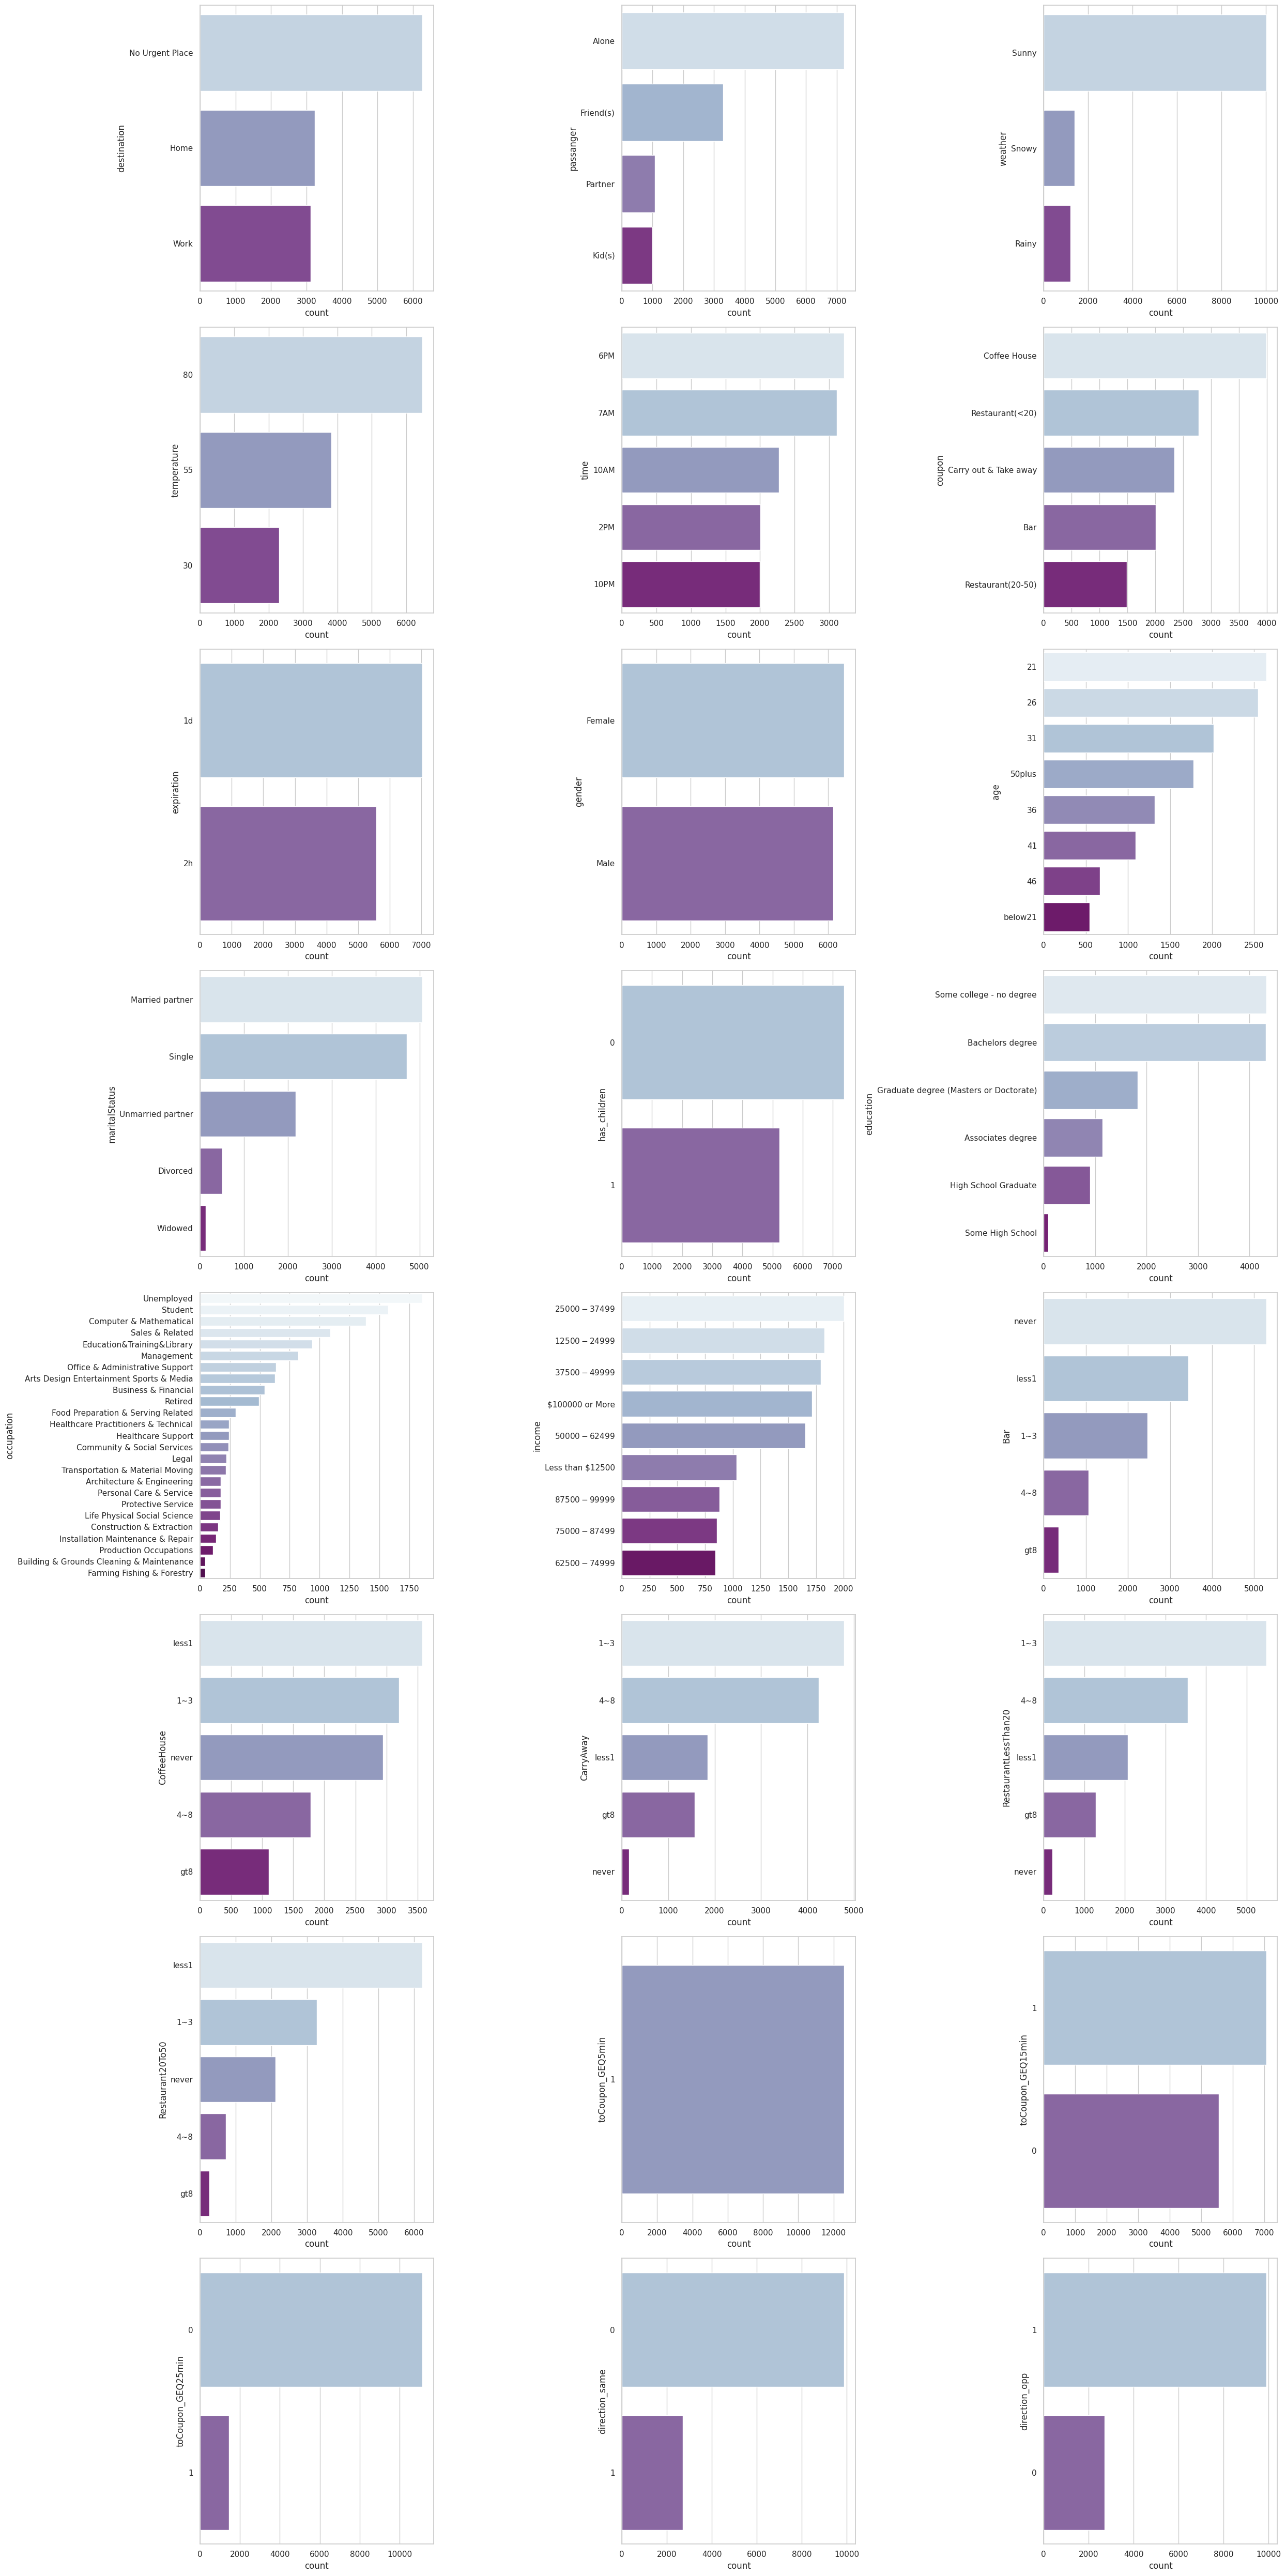

In [ ]:
fig, axes = plt.subplots(8, 3, figsize=(25,50))
axes = axes.flatten()

for ax, col in zip(axes, data.iloc[:, :-1].select_dtypes('object').columns):
    sns.countplot(y=col, data=data, ax=ax,
                  palette='BuPu', order=data[col].value_counts().index);

plt.tight_layout()
plt.show()

**Insights:**

>* The **"toCoupon_GEQ5min"** has **Zero variation** so it will be droped
* The **"direction_opp"** and **"direction_same"** are reversed from each other **(Have -1 correlation)** one of them should be dropped
* some the categories appear to be **very rare** need to be **checked whether it may be outliers**

In [ ]:
data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

In [ ]:
data.drop(columns=['direction_opp'], inplace=True)

* Check outliers

In [ ]:
data['maritalStatus'].value_counts()

maritalStatus
Married partner      5068
Single               4716
Unmarried partner    2185
Divorced              511
Widowed               130
Name: count, dtype: int64

*The **"Widowed"** category is low frequent but it will be kept it's not close enough to other categories conceptually.*

In [ ]:
data['education'].value_counts()

education
Some college - no degree                  4325
Bachelors degree                          4323
Graduate degree (Masters or Doctorate)    1827
Associates degree                         1148
High School Graduate                       899
Some High School                            88
Name: count, dtype: int64

*The **"Some High School"** has very low frequency **(less than 1%)** so it will be merged with the most similar category "High School Graduate"*

In [ ]:
data['education'].replace('Some High School', 'High School Graduate', inplace=True)
data['education'].value_counts()

education
Some college - no degree                  4325
Bachelors degree                          4323
Graduate degree (Masters or Doctorate)    1827
Associates degree                         1148
High School Graduate                       987
Name: count, dtype: int64

In [ ]:
data['CarryAway'].value_counts()

CarryAway
1~3      4795
4~8      4242
less1    1849
gt8      1572
never     152
Name: count, dtype: int64

In [ ]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5485
4~8      3553
less1    2071
gt8      1282
never     219
Name: count, dtype: int64

*The **"never"**category in **"CarryAway","RestaurantLessThan20"** has a low frequency **(about 1.5%)** so it will be merged with the similar category **less1**.*

In [ ]:
data['CarryAway'].replace('never', 'less1', inplace=True)
data['RestaurantLessThan20'].replace('never', 'less1', inplace=True)

In [ ]:
print(data['CarryAway'].value_counts())
print(data['RestaurantLessThan20'].value_counts())

CarryAway
1~3      4795
4~8      4242
less1    2001
gt8      1572
Name: count, dtype: int64
RestaurantLessThan20
1~3      5485
4~8      3553
less1    2290
gt8      1282
Name: count, dtype: int64


# EDA: Data Exploration

## Driver Features

***How Different Driver features influence his consume of the coupons?***

### Demographic Analysis

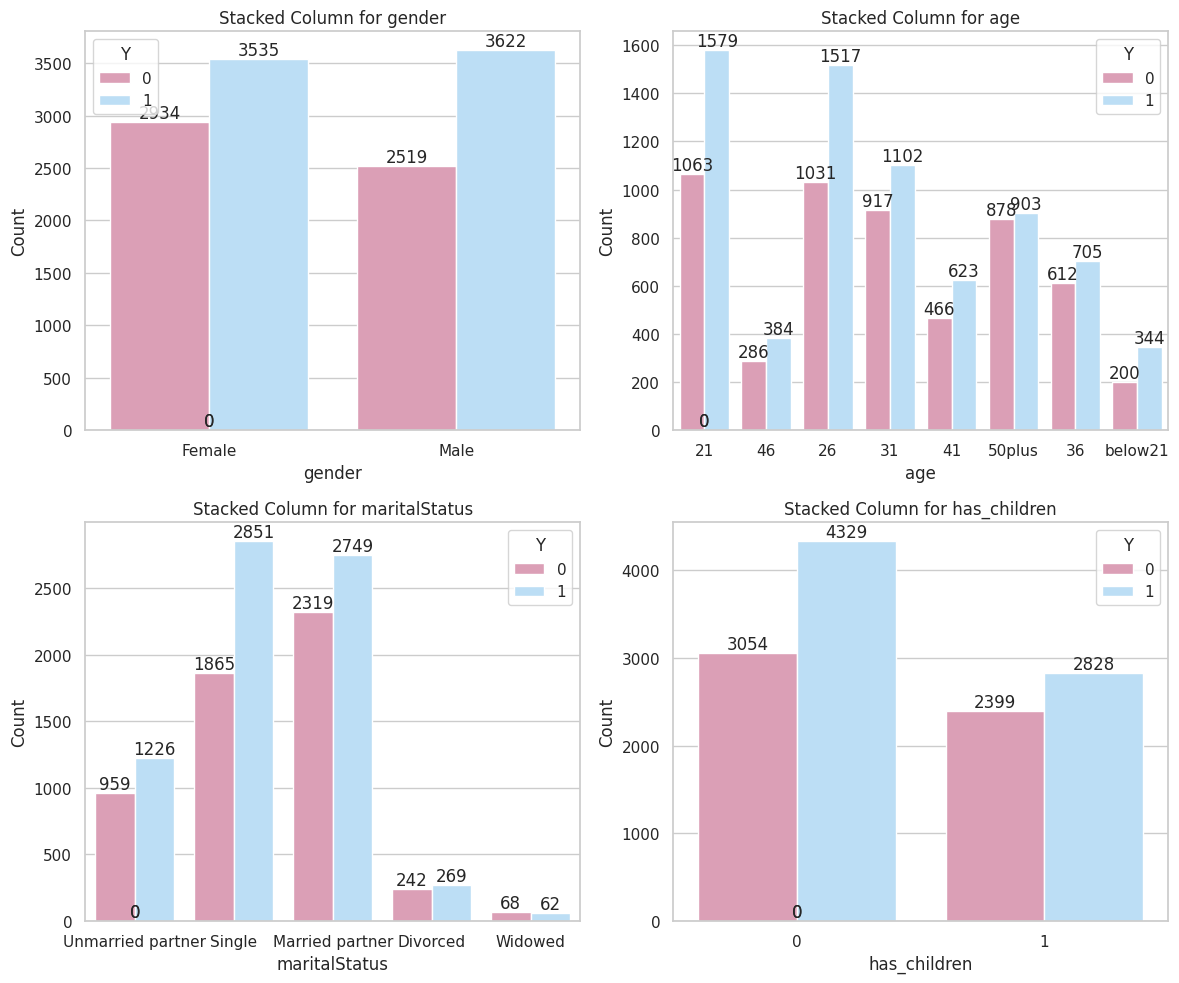

In [ ]:
user_features = ['gender', 'age', 'maritalStatus', 'has_children']
target_variable = 'Y'

custom_palette = ['#e595b4', '#b2e0ff']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes = axes.flatten()

for ax, feature in zip(axes, user_features):
    sns.countplot(data=data, x=feature, hue=target_variable, ax=ax, palette=custom_palette)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title=target_variable)
    ax.set_title(f'Stacked Column for {feature}')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insights:**
> **Gender:**  <br>
    - The chance  to accept the coupon is **4.34%**  *higher* for **Male** than **Female** <br>
    
> **Age:**   <br>
    - The rate of acceptance of coupons for those aged **21 and 26** is *higher than* other ages  ,and have an approximately **59.5%** <br>
    
> **Marital Status:**<br>
    - The **highest** coupon acceptance rate is for **Single**, which is **60.45%** <br>
    - Immediately followed by **Married partner** with **54.24%** <br>
    
> **Has_Children:**<br>
     - We note that users **without children** have a *higher percentage* of accepting coupons **than** those who **have children** by **4.53%** percent

### Socio-Economic Analysis

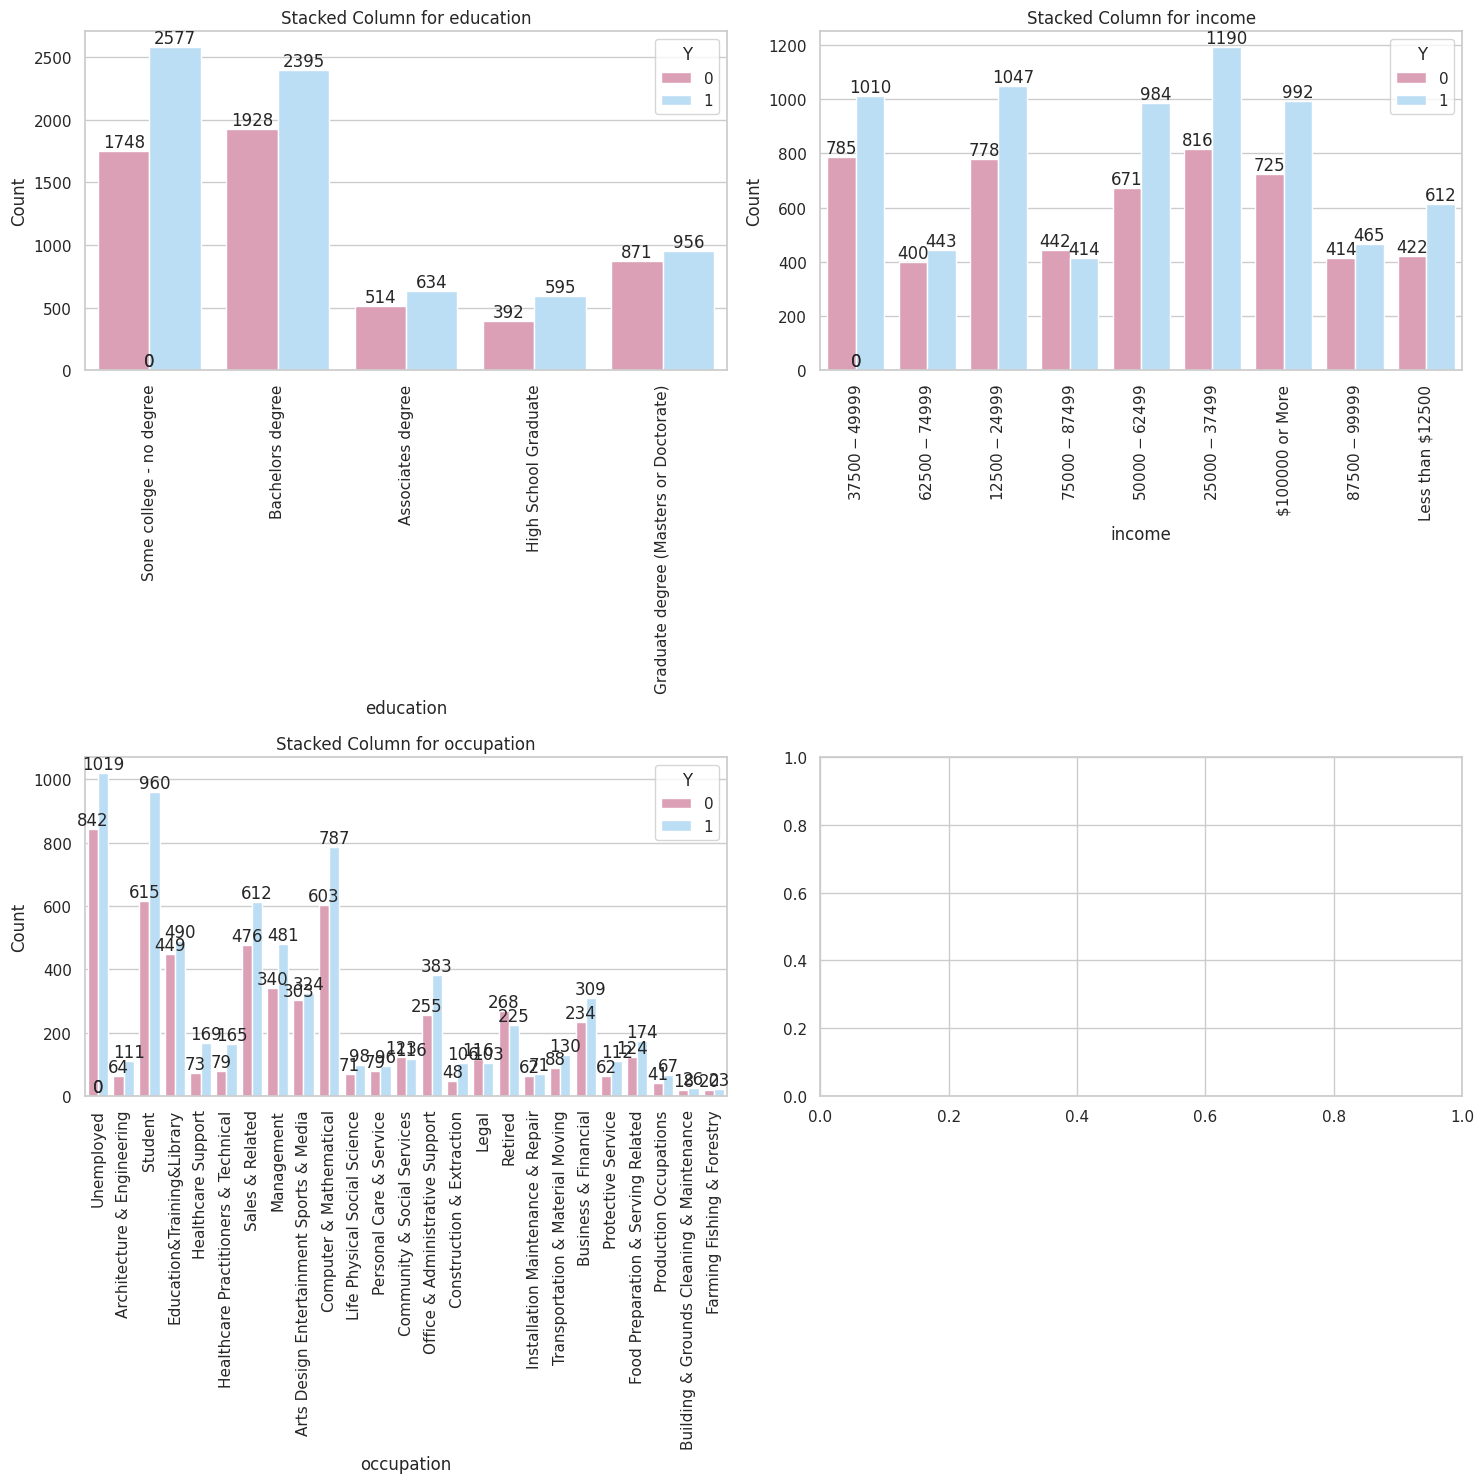

In [ ]:
user_features = ['education', 'income','occupation']
target_variable = 'Y'

custom_palette = ['#e595b4', '#b2e0ff']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axes = axes.flatten()

for ax, feature in zip(axes, user_features):
    sns.countplot(data=data, x=feature, hue=target_variable, ax=ax, palette=custom_palette)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title=target_variable)
    ax.set_title(f'Stacked Column for {feature}')
    ax.tick_params(axis='x', rotation=90)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insights:**
> **Education:**  <br>
    - The chance to accept the coupon is **59.6%** for user have an education **Some collage - no degree** which is the highest acceptance percentage <br>
    
> **Income:**<br>
    - The **highest** coupon acceptance rate is for users with income **50000-62499**, which is **59.5%** <br>
    - Immediately followed by users with income **25000-37499** with **59.3%** <br>
    
> **Occupation:**<br>
     - We note that the **Unemployed** are *offered the largest percentage of coupons*, *followed* by **Student**,**but** the **acceptance rate** of these coupons is **higher for Student** than for the **Unemployed** by **6.2%**.

### Expense Analysis

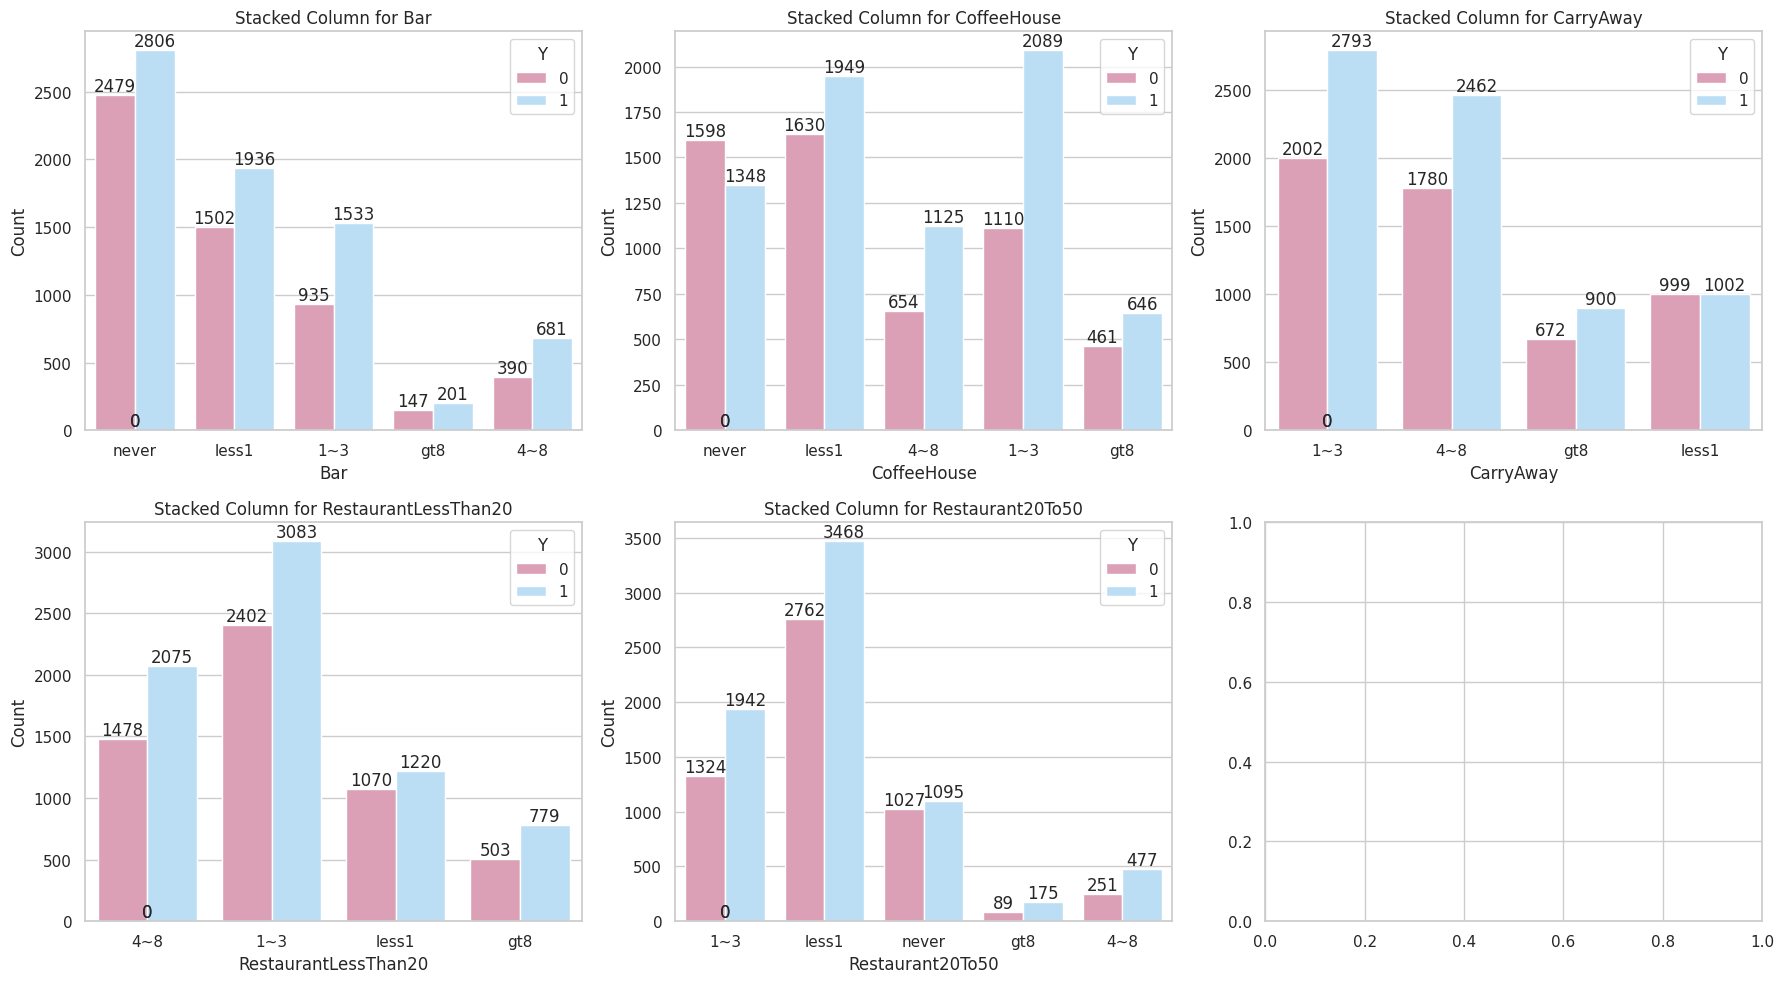

In [ ]:
user_features = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
target_variable = 'Y'

custom_palette = ['#e595b4', '#b2e0ff']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

axes = axes.flatten()

for ax, feature in zip(axes, user_features):
    sns.countplot(data=data, x=feature, hue=target_variable, ax=ax, palette=custom_palette)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title=target_variable)
    ax.set_title(f'Stacked Column for {feature}')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insights:**
> The highest acceptance rate is always at the value **1~3** for All Features <br>
    - **Bar** is **62.12%** <br>
    - **CoffeeHouse** is **65.3%** <br>
    - **CarryAway** is **58.25%** <br>
    - **RestaurantLessThan20** is **56.2%** <br>
    - **Restaurant20To50** is **55.67%** for **1~3** and **less1**


### Analytical Questions

* **Do users with children have different coupon usage patterns compared to users without children?**

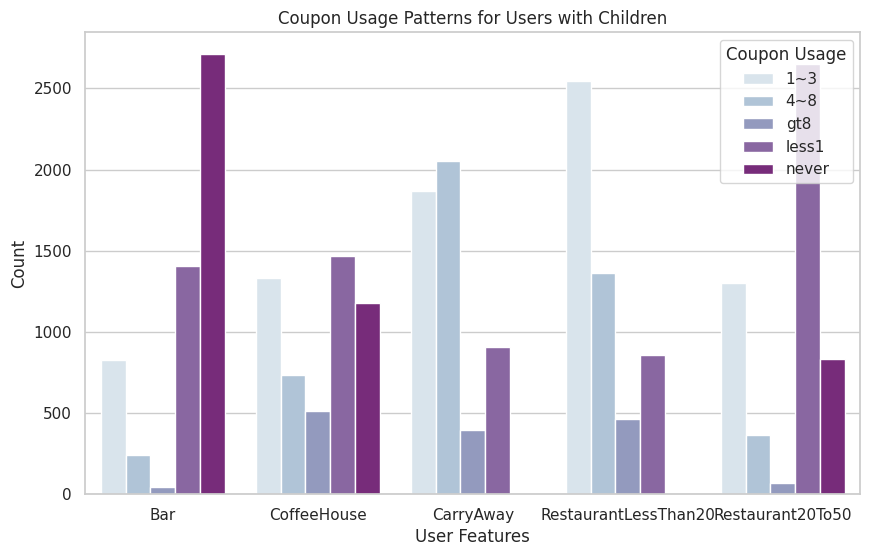

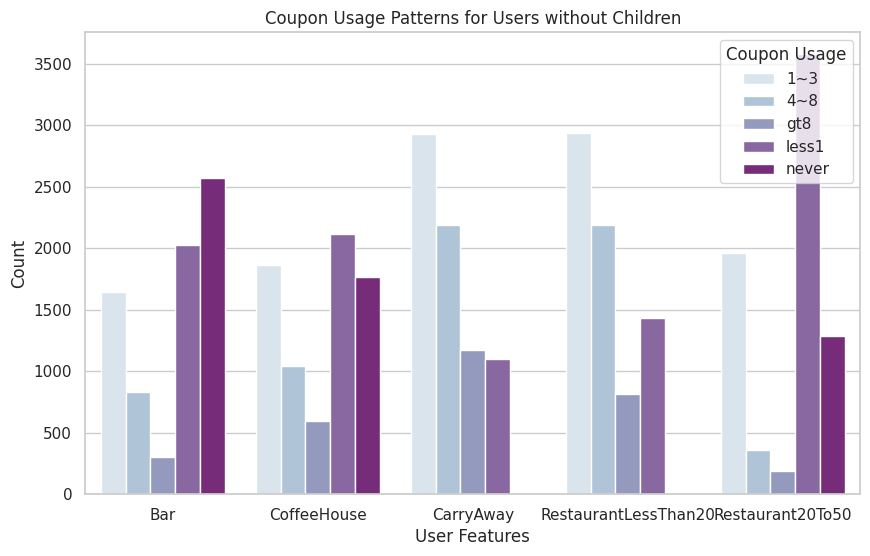

In [ ]:
users_with_children = data[data['has_children'] == 1]
users_without_children = data[data['has_children'] == 0]

user_features = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


coupon_usage_with_children = users_with_children[user_features].apply(pd.Series.value_counts).fillna(0).astype(int)


coupon_usage_without_children = users_without_children[user_features].apply(pd.Series.value_counts).fillna(0).astype(int)

coupon_usage_with_children = coupon_usage_with_children.reset_index()
coupon_usage_without_children = coupon_usage_without_children.reset_index()


coupon_usage_with_children_melted = coupon_usage_with_children.melt(id_vars='index', var_name='User Feature', value_name='Count')
coupon_usage_without_children_melted = coupon_usage_without_children.melt(id_vars='index', var_name='User Feature', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='User Feature', y='Count', hue='index', palette = 'BuPu', data=coupon_usage_with_children_melted)
plt.title('Coupon Usage Patterns for Users with Children')
plt.xlabel('User Features')
plt.ylabel('Count')
plt.legend(title='Coupon Usage')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='User Feature', y='Count', hue='index', palette = 'BuPu', data=coupon_usage_without_children_melted)
plt.title('Coupon Usage Patterns for Users without Children')
plt.xlabel('User Features')
plt.ylabel('Count')
plt.legend(title='Coupon Usage')
plt.show()

**Insights:**
> **Users With Children:** <br>
      We found that users with children tend to go to **RestaurantLessThan20** **(1~3)** times at the month <br> and go to **Restaurant20To50** and **CoffeeHouse** **(less1)** at month <br> and they visit **CarryAway** approximately **(4~8)** and **(1~3)** times a month <br> and **(never)** go to the **Bar** <br>
    
> **Users Without Children:** <br>
    We found that users without children go **1~3** times a month to **RestaurantLessThan20** and **CarryAway** <br> and **less1** to **Restaurant20To50** and **CoffeeHouse** <br> and **(never)** go to the **Bar** <br>

* **Are there differences in restaurant visit frequencies based on occupation and education level?**

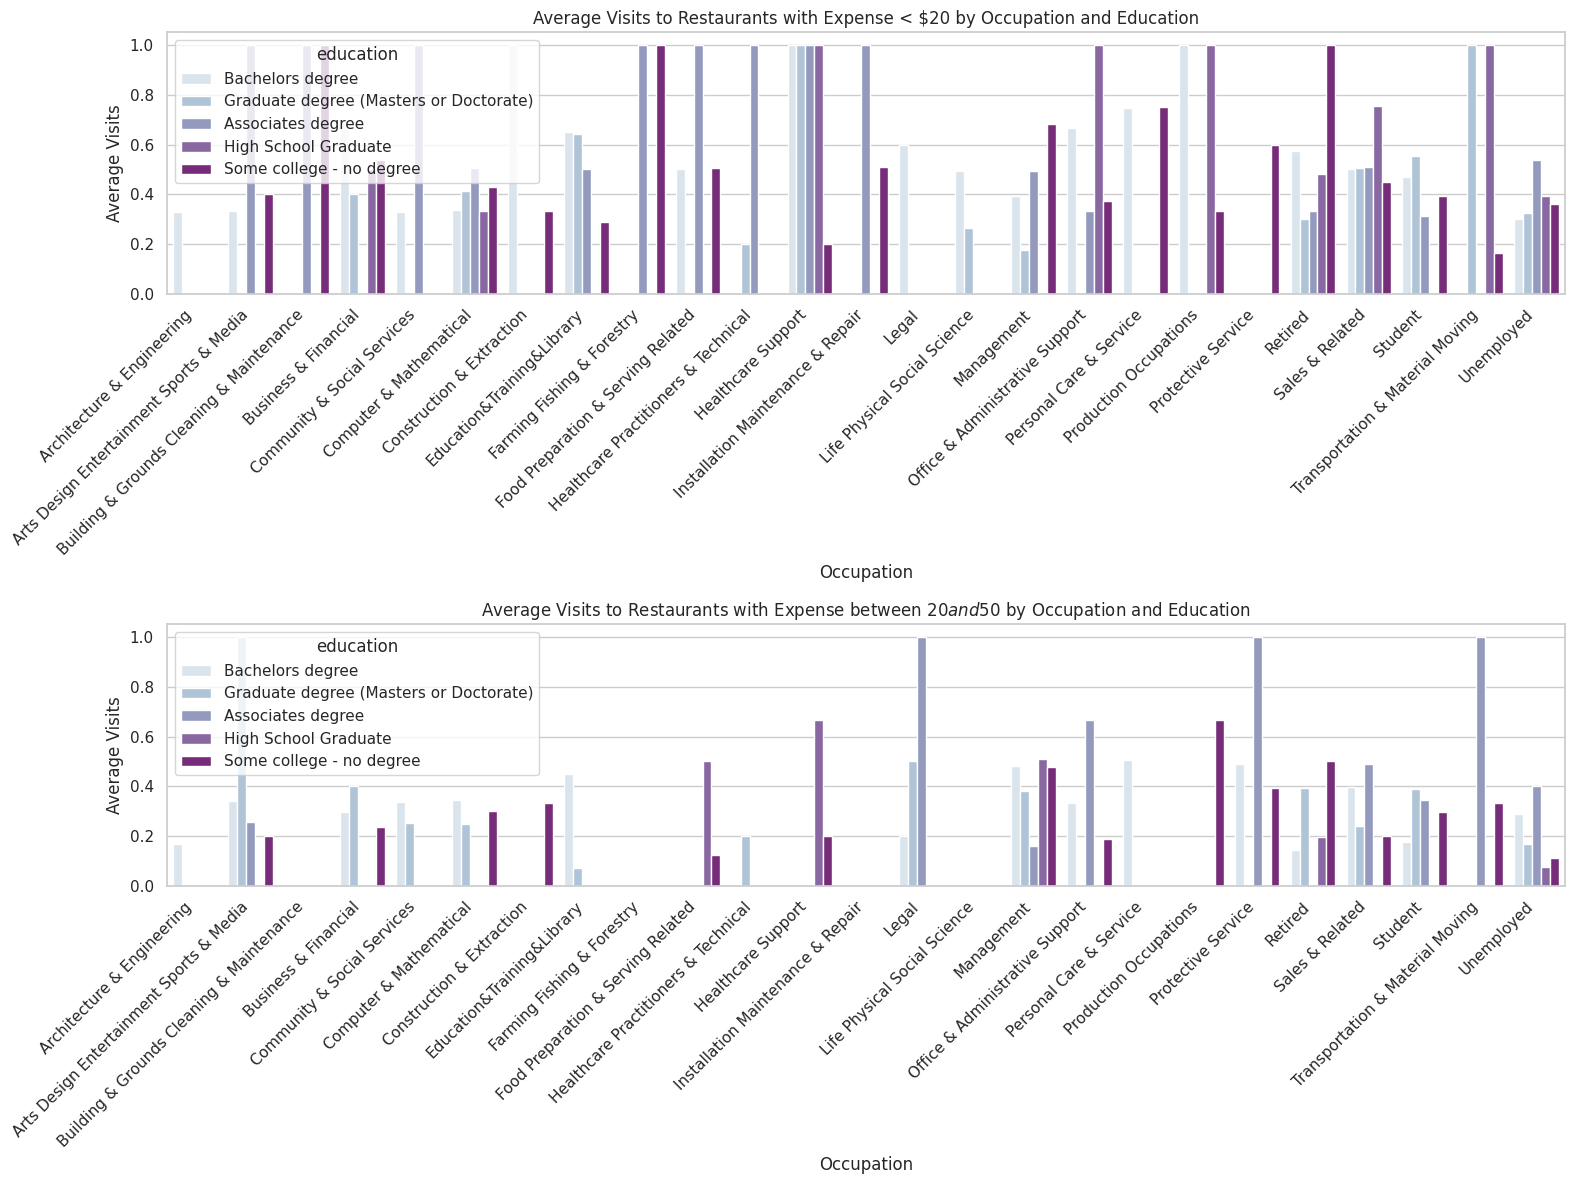

In [ ]:
columns = ['education', 'occupation', 'RestaurantLessThan20', 'Restaurant20To50']
df = data[columns].copy()
df_encoded = pd.get_dummies(df, columns=['RestaurantLessThan20', 'Restaurant20To50'])

grouped = df_encoded.groupby(['occupation', 'education']).mean().reset_index()
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

sns.barplot(data=grouped, x='occupation', y='RestaurantLessThan20_1~3', hue='education', ax=axes[0], palette = 'BuPu')
axes[0].set_title('Average Visits to Restaurants with Expense < $20 by Occupation and Education')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Average Visits')

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(data=grouped, x='occupation', y='Restaurant20To50_1~3', hue='education', ax=axes[1],palette = 'BuPu')
axes[1].set_title('Average Visits to Restaurants with Expense between $20 and $50 by Occupation and Education')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Average Visits')

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**<br>

**We use the users who go to RestaurantLessThan20 & Restaurant20To50  [1~3] which has the highest acceptance ,to know there education level and occupation field** <br>

> **Average visits to RestaurantLessThan20 by Occupation and Education:** <br>

>    - Users with **Associates degree** have **"1"** average visits in occupation fields :<br>
        1.Arts & Entertainment<br>
        2.Healthcare<br>
        3.Maintenance & Repair<br>
        4.Community & Social Services<br>
        
>    - Users with **Bachelors degree** have **"1"** average visits in occupation fields :<br>
        1.Constraction & Extraction <br>
        2.Healthcare support<br>
        3.Production Occupation <br>
        
>    - Users with **Graduate degree** have **"1"** average visits in occupation fields :<br>
        1.Healthcare support<br>
        2.Transportation & Material Moving  <br>
       
>    - Users with **High School Graduate** have **"1"** average visits in occupation fields :<br>
        1.Healthcare support<br>
        2.Transportation & Material Moving  <br>
        3.Office & Production Occupation <br>
        
>    - Users with **Some Collage** have **"1"** average visits in occupation fields :<br>
        1.Maintenance & Protective Service<br>
        2.Farming<br>

> **Average visits to Restaurant20To50 by Occupation and Education:** <br>

>    - Users with **Associates degree** have **"1"** average visits in occupation fields :<br>
        1.Legal<br>
        2.Transportation<br>
        
>    - Users with **Bachelors degree** have **"0.5"** average visits in occupation fields :<br>
        1.Education & Training <br>
        2.Protective Services<br>
        
>    - Users with **Graduate degree** have **"1"** average visits in occupation fields :<br>
        1.Arts & Media <br>
       
>    - Users with **High School Graduate** have **"0.6"** average visits in occupation fields :<br>
        1.Healthcare support<br>
        2.Food Preparation  <br>
        
>    - Users with **Some Collage** have **"0.7"** average visits in occupation fields :<br>
        1.Production Occupation<br>
      

* **How does the coupon usage vary across different age groups & gender?**

In [ ]:
accepted_coupons = data[data['Y'] == 1]

coupon_usage = accepted_coupons.groupby(['age', 'gender'])['coupon'].value_counts().unstack(fill_value=0)
coupon_usage["Total"] = coupon_usage[coupon_usage.columns].sum(axis=1)

coupon_usage

coupon          Bar  Carry out & Take away  Coffee House  Restaurant(20-50)  \
age     gender                                                                
21      Female   91                    164           224                 60   
        Male    120                    188           239                 71   
26      Female   83                    147           220                 58   
        Male    110                    189           214                 86   
31      Female   53                    142           176                 57   
        Male     71                    130           118                 41   
36      Female   25                     83            82                 32   
        Male     38                    102           106                 46   
41      Female   39                     82            89                 34   
        Male     38                     65            74                 27   
46      Female   13                     47            48                 24   
        Male     23                     40            62                 16   
50plus  Female   34                    165           139                 44   
        Male     50                     96            90                 35   
below21 Female   17                     33            29                 13   
        Male     19                     47            79                 13   

coupon          Restaurant(<20)  Total  
age     gender                          
21      Female              195    734  
        Male                227    845  
26      Female              191    699  
        Male                219    818  
31      Female              189    617  
        Male                125    485  
36      Female               86    308  
        Male                105    397  
41      Female               90    334  
        Male                 85    289  
46      Female               52    184  
        Male                 59    200  
50plus  Female              145    527  
        Male                105    376  
below21 Female               40    132  
        Male                 54    212

**Insights:**
> There seems to be a general trend of **higher overall coupon usage** for **younger age groups (21-41)** compared to older ones (46+, 50plus).
  - *This suggest **younger** people are **more receptive** to coupon promotions.* <br>
    
> **Coupon Preferences:** <br>
> - **Carry out & Take away** and **Coffee House:** <br> **Both genders** seem to use these coupons more frequently across **all age groups** compared to other types. <br>
    - *This suggests these are popular choices for both genders and across different age demographics.* <br> <br>
> - **Bar** and **Restaurant(20-50):** <br> Usage patterns for these types vary more across age groups and genders. <br>
    **Younger males (21-31)** show a **slightly higher** tendency to use **Bar** coupons compared to **females**. <br>
    **Older females (46+, 50plus)** use **Restaurant(20-50)** coupons **slightly more than males**. <br> <br>
> - **Restaurant(<20):** <br> Usage seems to be moderate and somewhat consistent across genders within most age groups. <br>
    * These coupons likely offer discounts on meals under &dollar;20, making them generally appealing across genders and age groups. They can be a way to save on a casual dining experience without a significant investment.* <br>

In [ ]:
coupon_usage_gender = accepted_coupons.groupby(['gender'])['coupon'].value_counts().unstack(fill_value=0)

coupon_usage_gender

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
gender,,,,,
Female,355,863,1007,322,988
Male,469,857,982,335,979


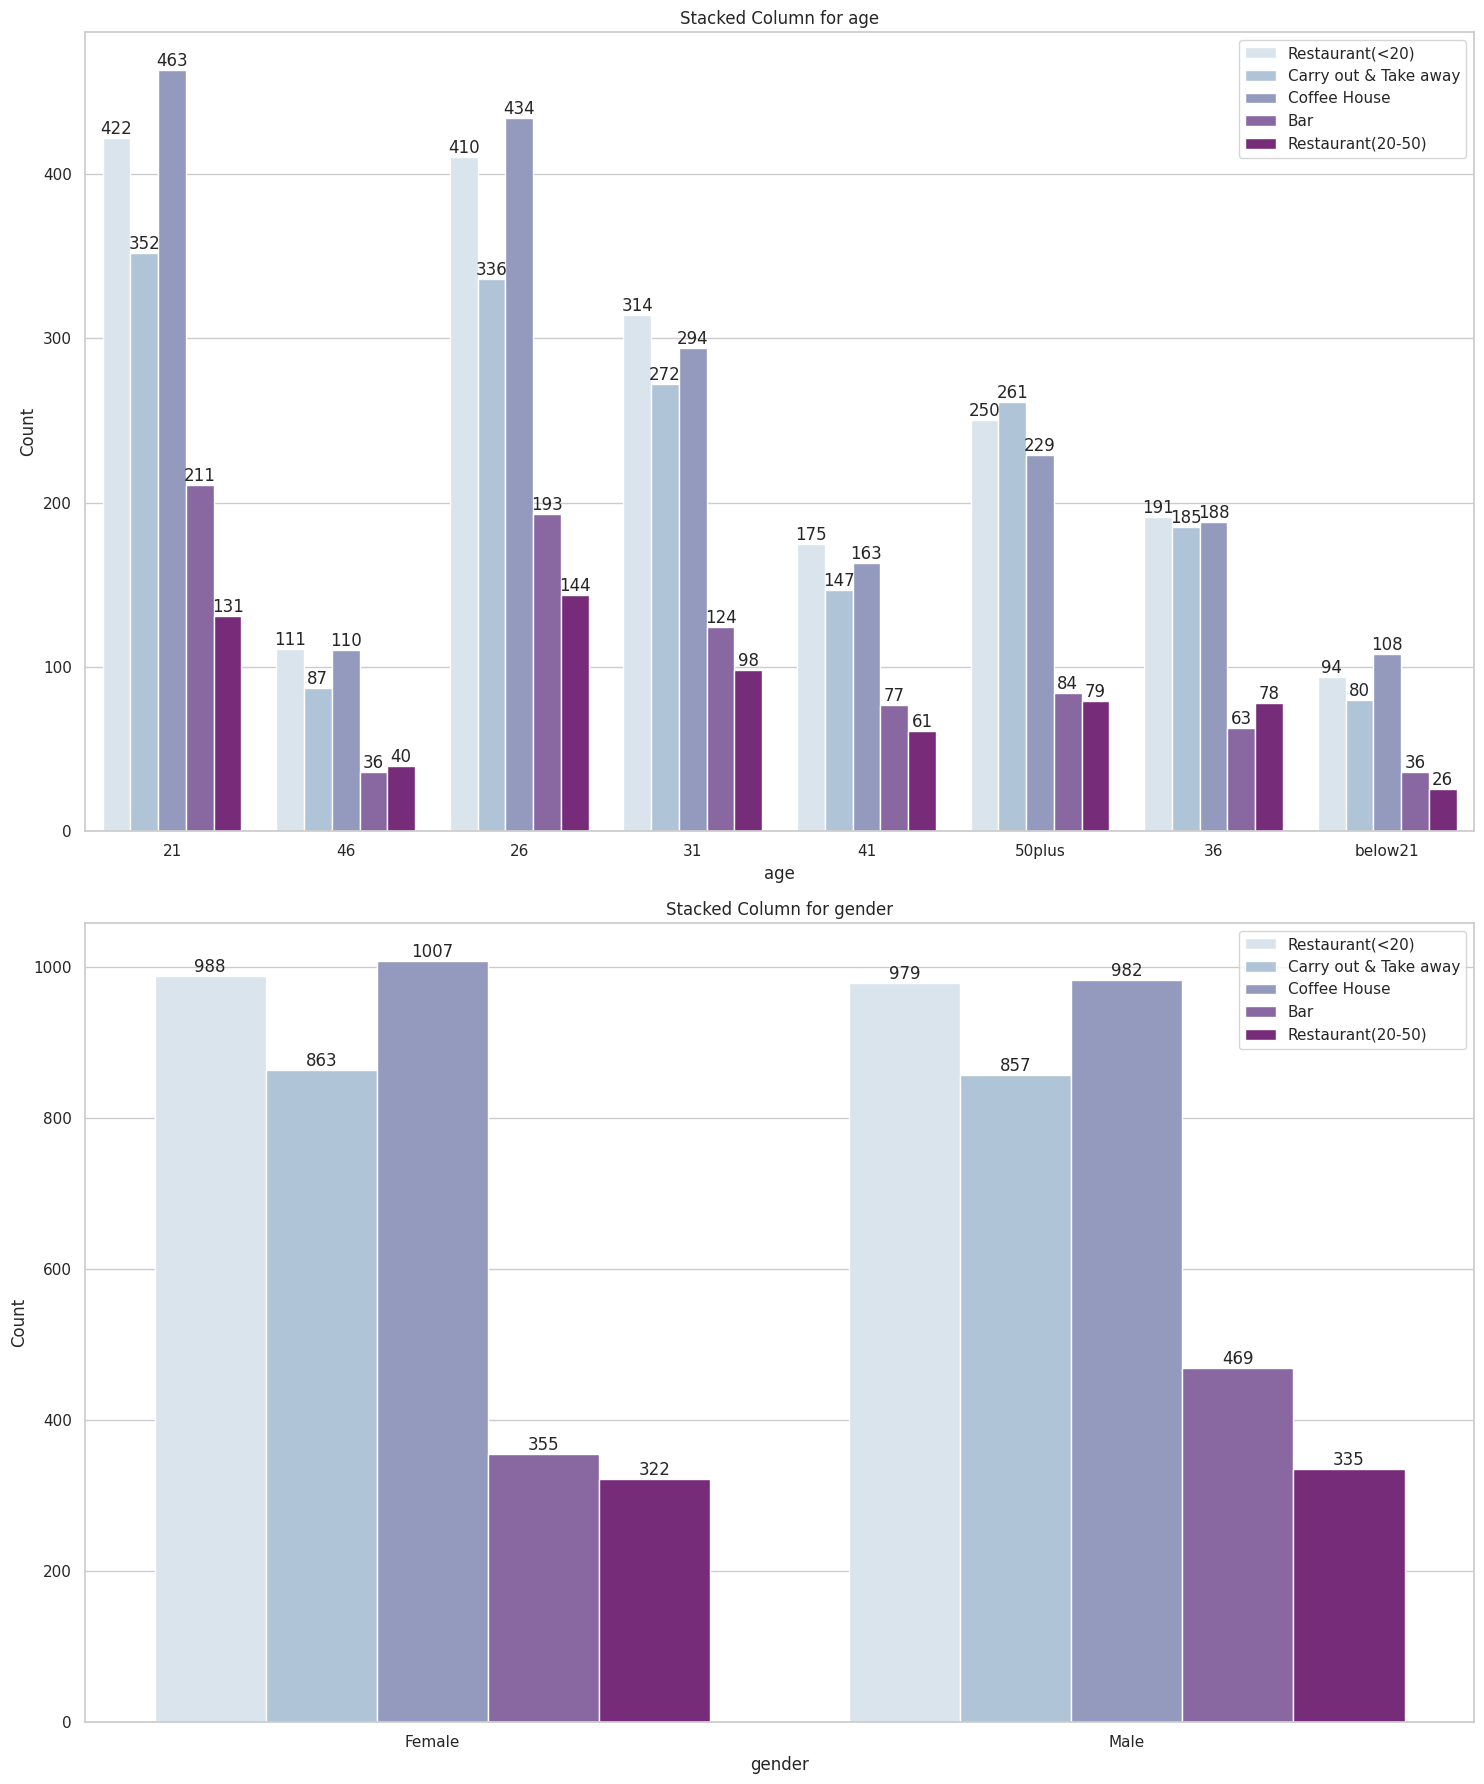

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 18))

axes = axes.flatten()

for ax, feature in zip(axes, ['age', 'gender']):
    sns.countplot(data=accepted_coupons.sort_values(by=['age']), x=feature, hue=accepted_coupons['coupon'], ax=ax, palette="BuPu")
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend()
    ax.set_title(f'Stacked Column for {feature}')

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
plt.tight_layout()
plt.show()

**Insights:**
> **Coupon Preference by Age:**
> - Across all age groups, **Coffee House** seems to be the **most popular** coupon type, followed by **Restaurant(<20)** and **Carry out & Take away**. <br> The preference for **Bar** and **Restaurant(20-50)** coupons appears to be **lower** compared to other types.
  - *There might be reasons to explore why these are less popular like price range and type of food* <br>
> - **Younger age groups (below21, 21)** show a **higher preference** for **Restaurant(<20)** coupons compared to older groups.   
  - *This suggests they might be more budget-conscious.* <br>
> - **Older age groups (41, 46, 50plus)** seem to have a relatively **lower preference** for **Carry out & Take away** coupons compared to younger ones. <br>   
  - *They might prefer to dine in at these establishments.* <br>

> **Coupon Preference by Gender:**
> - Both **Female** and **Male** have **similar** overall counts across all coupon types. <br>


* **Are users who go to coffee houses frequently more likely to get take-away food often?**

In [ ]:
data_copy = data

In [ ]:
data_copy["coffeeHouse_freq"] = data_copy["CoffeeHouse"].replace({'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 8})
data_copy["carryAway_freq"] = data_copy["CarryAway"].replace({'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 8})

In [ ]:
correlation = data_copy["coffeeHouse_freq"].corr(data_copy["carryAway_freq"])
correlation

0.22574332173633752

> - The correlation coefficient (0.2238) indicates a **weak positive correlation** between coffee house visit frequency and take-away food order frequency. <br>


In [ ]:
average_carryaway = data.groupby(["coffeeHouse_freq"])["carryAway_freq"].mean()
average_carryaway

coffeeHouse_freq
0    3.456551
1    3.608270
2    3.930603
6    4.304666
8    5.682023
Name: carryAway_freq, dtype: float64

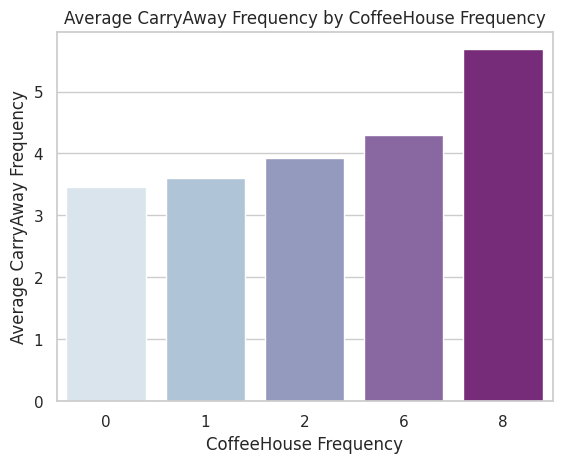

In [ ]:
sns.barplot(x=average_carryaway.index, y=average_carryaway.values, palette="BuPu")
plt.xlabel("CoffeeHouse Frequency")
plt.ylabel("Average CarryAway Frequency")
plt.title("Average CarryAway Frequency by CoffeeHouse Frequency")
plt.show()

**Insights:**
> - People categorized as "**coffeeHouse_freq = 0**" (presumably never visit coffee houses) have an **average carry-away frequency of 3.45**. <br>
  - *This indicates that even users who never visit coffee houses might order take-away occasionally.*
> - The plot show a **positive trend**.  As the coffee house visits increases, the average carry-away frequency also increases.
   - **This suggests that people who visit coffee houses more frequently tend to order take-away food more often on average compared to those who visit less frequently.**

* **How does the frequency of restaurant visits differ based on income level and marital status?**

In [ ]:
data_copy = data

data_copy["restaurant_visits"] = data_copy['RestaurantLessThan20'].replace({
    'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 8
}) + data_copy['Restaurant20To50'].replace({
    'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 8
})

In [ ]:
# Group by income and marital status, calculate average visit frequency
visit_frequency = data_copy.groupby(['income', 'maritalStatus'])['restaurant_visits'].sum().unstack()
visit_frequency['sum'] = visit_frequency[visit_frequency.columns].sum(axis=1)

visit_frequency

maritalStatus,Divorced,Married partner,Single,Unmarried partner,Widowed,sum
income,,,,,,
$100000 or More,NaN,7677.0,2258.0,569.0,NaN,10504.0
$12500 - $24999,1391.0,1610.0,3205.0,1895.0,286.0,8387.0
$25000 - $37499,627.0,2404.0,3538.0,1547.0,NaN,8116.0
$37500 - $49999,482.0,3402.0,4573.0,1273.0,NaN,9730.0
$50000 - $62499,88.0,3977.0,2691.0,1338.0,NaN,8094.0
$62500 - $74999,60.0,1989.0,1281.0,1570.0,NaN,4900.0
$75000 - $87499,NaN,2513.0,1405.0,720.0,NaN,4638.0
$87500 - $99999,NaN,2831.0,1012.0,374.0,NaN,4217.0
Less than $12500,198.0,310.0,3654.0,1078.0,250.0,5490.0


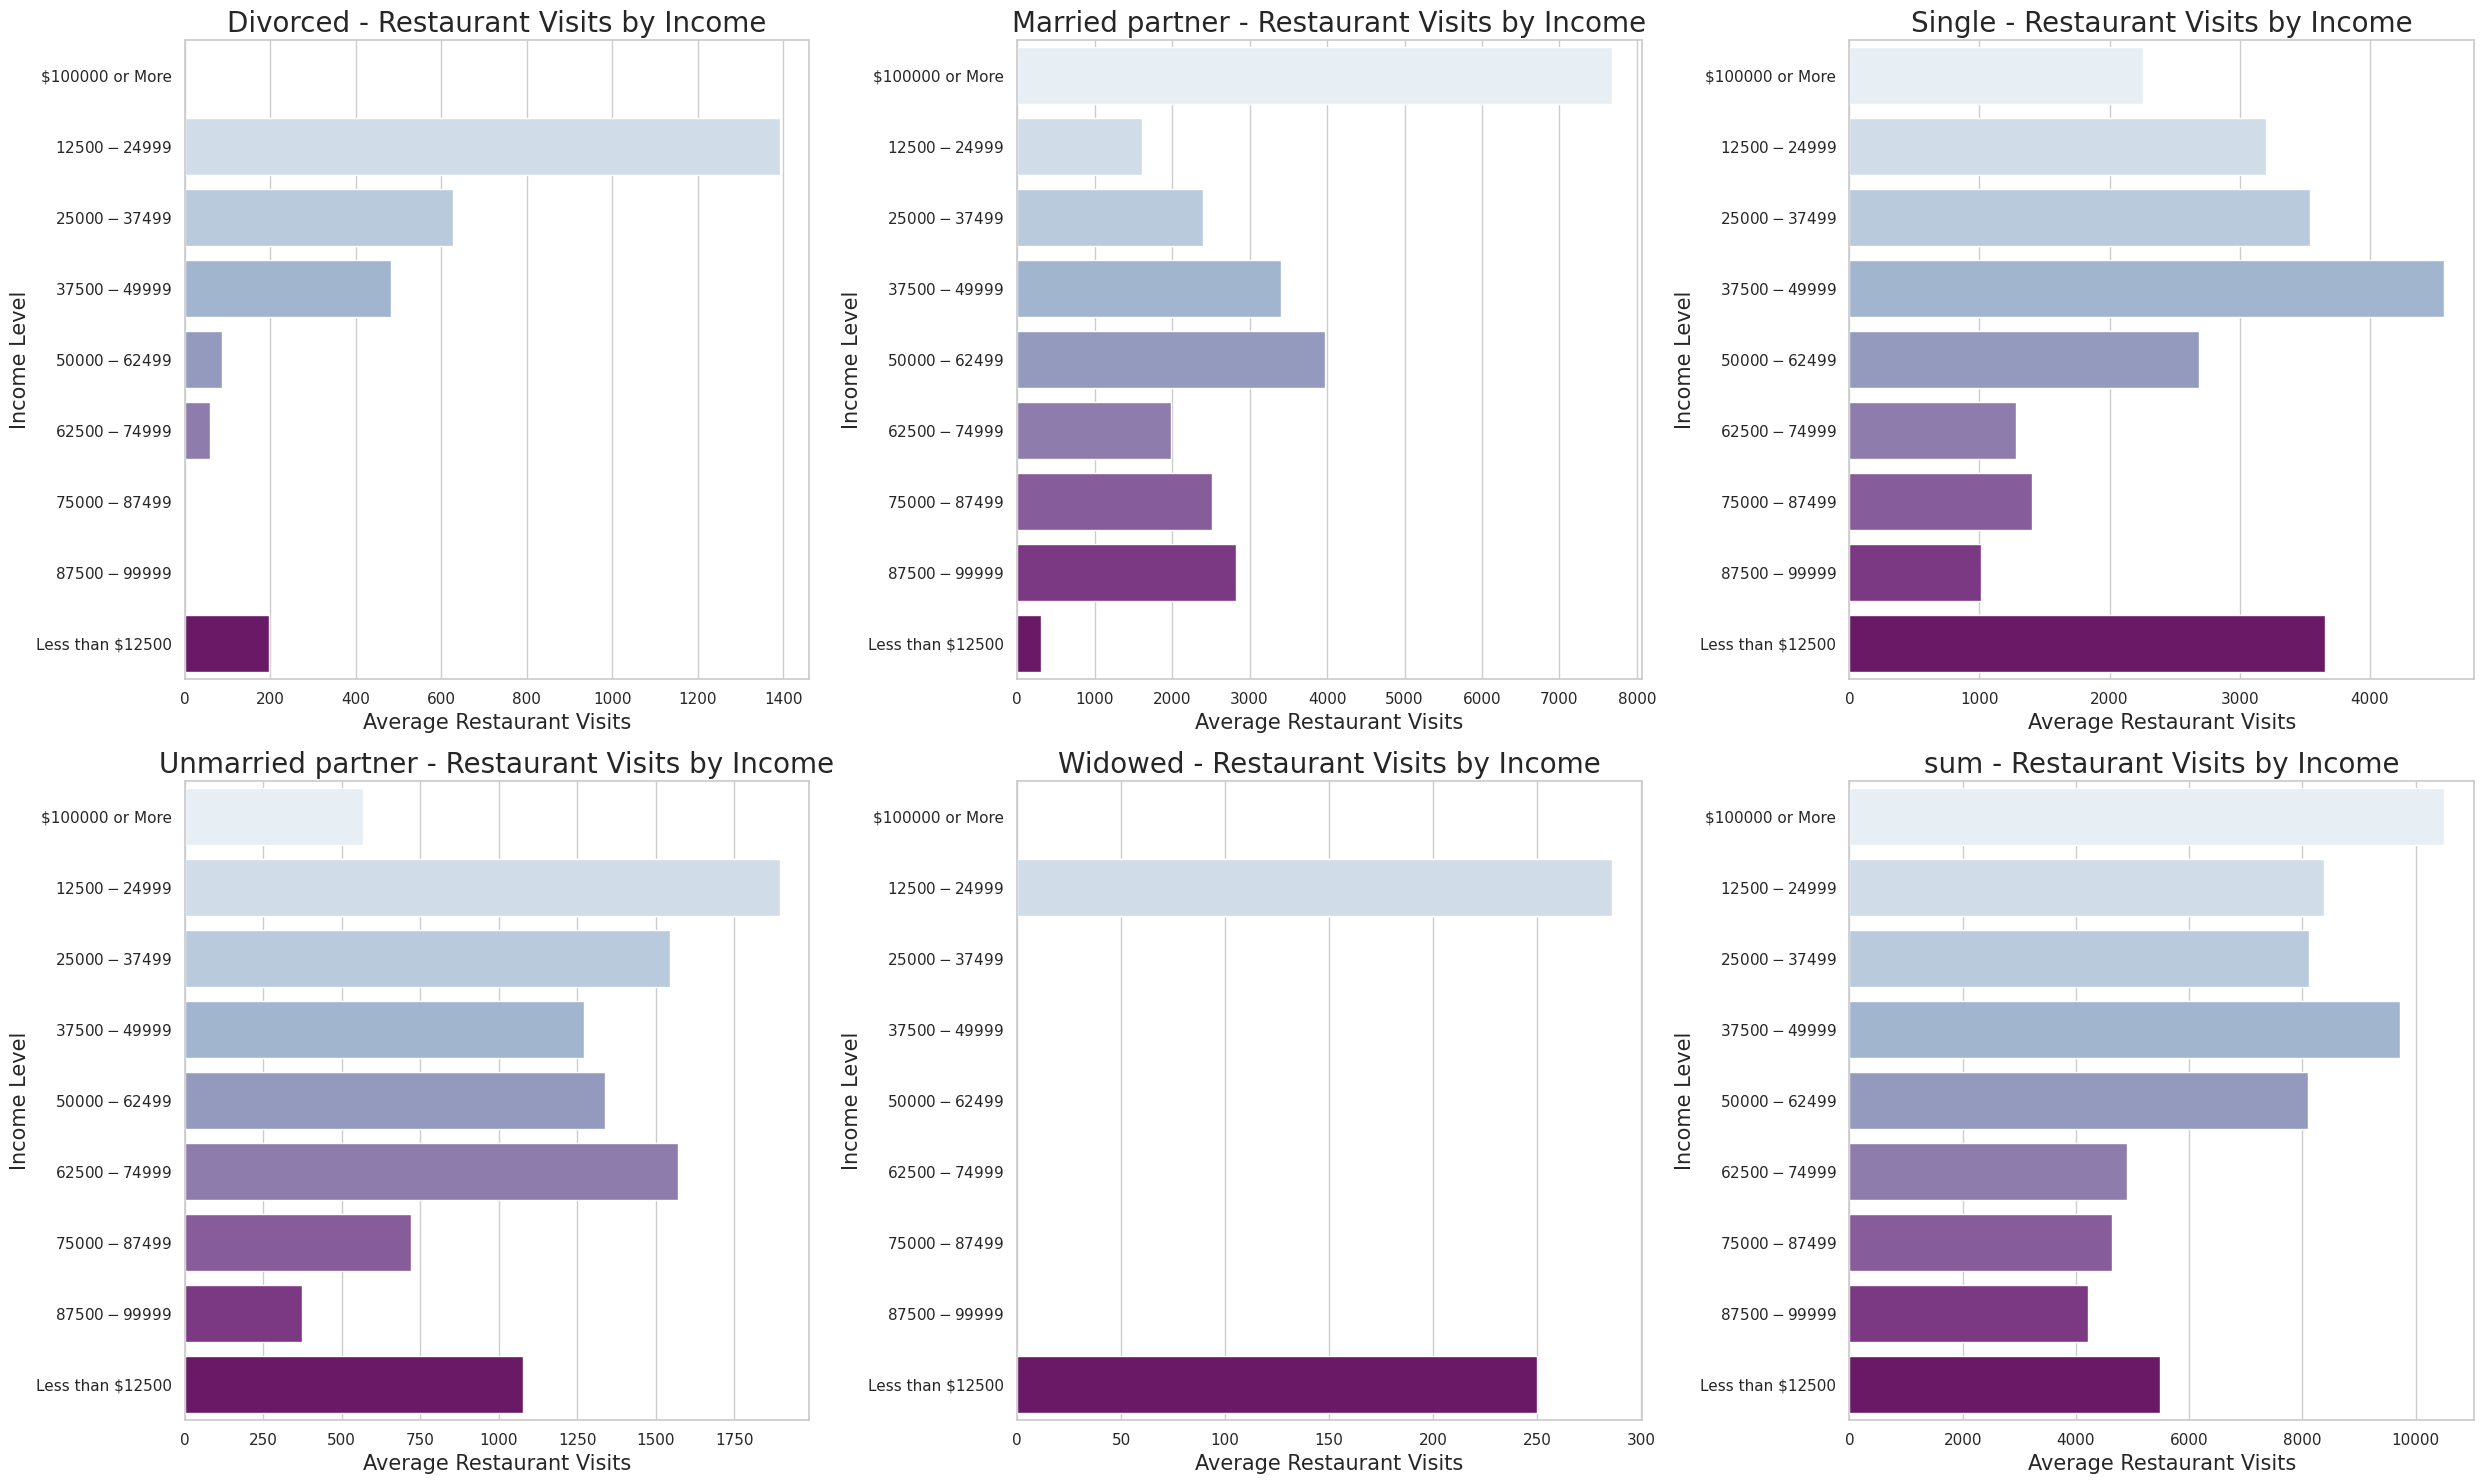

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))

axes = axes.flatten()

for ax, col in zip(axes, visit_frequency.columns ):
    sns.barplot(x=visit_frequency[col], y=visit_frequency.index, ax=ax, palette="BuPu", orient='h')
    ax.set_ylabel('Income Level', fontsize=15)
    ax.set_xlabel('Average Restaurant Visits', fontsize=15)
    ax.set_title(f'{col} - Restaurant Visits by Income', fontsize=20)

plt.tight_layout()
plt.show()

**Insights:**

> - There seems to be a general trend of **higher total restaurant visits** for **middle-income groups (&dollar;25000 - &dollar;49999)** compared to both very low and very high-income groups. <br> <br>
> - **Single individuals** seem to have a **higher** total restaurant visit frequency compared to other marital statuses **across most income levels**, **except for "Less than &dollar;12500"**. <br> *they might not have established home-cooked routines and find dining out more convenient, especially with busy schedules.*

> **Marital Status and Restaurant Visits:** <br>
> - **Married partner:** This group shows moderate total visit frequency across most income levels. <br>
  - *Couples might share cooking and meal-planning duties, leading to a balance between eating out and cooking at home.*
> - **Single:** This group generally has the highest total visit frequency across most income levels, except for "Less than $12500". <br>
  - *This suggests single individuals might dine out more frequently compared to other marital statuses.*
* **Unmarried partner:** Their total visit frequency varies more across income levels. <br>
  - *If they don't cohabitate, they might dine out more often when they meet compared to couples living together who might cook at home more.*

> - **Divorced and Widowed:** They have the lowest total visit frequencies. <br>
  - *This could be due to:*
  1.   *Smaller household size or living alone.*
  2.   *Different social circles or dining preferences after life changes.*


## Contextual Features

***How does the driving environment effect the coupons consumption ?***

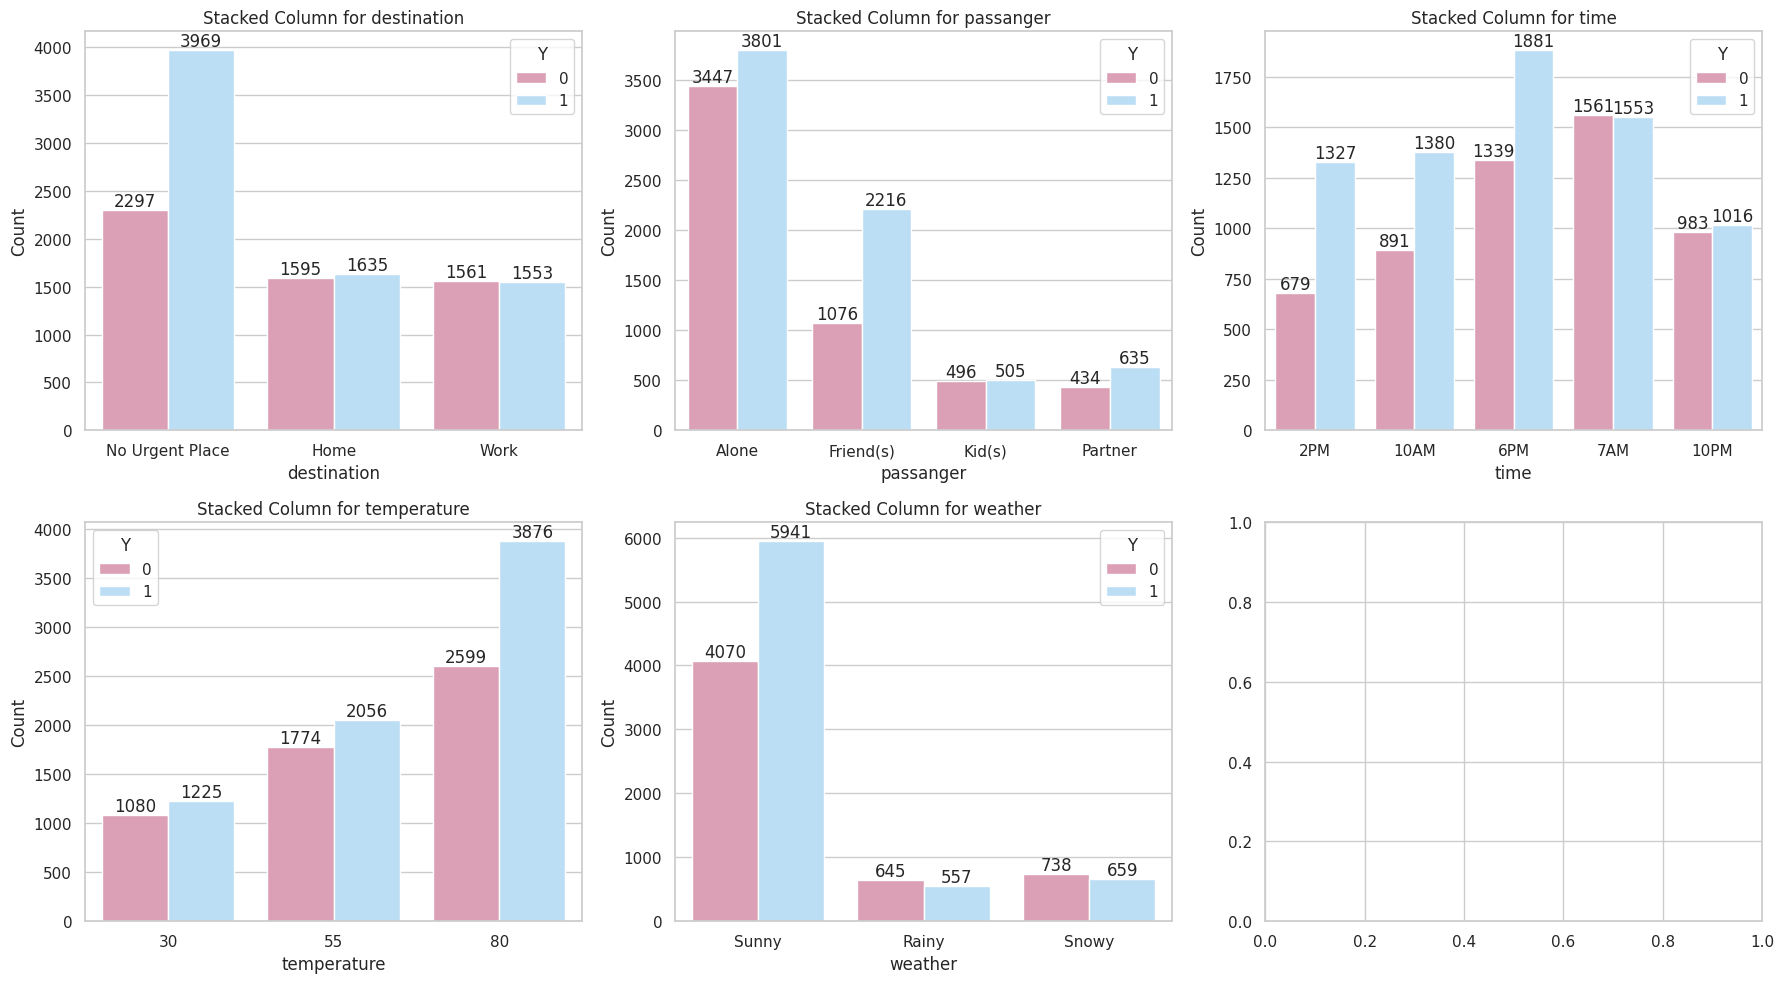

In [ ]:
categorical_features = ['destination', 'passanger', 'time','temperature', 'weather']
target_variable = 'Y'

custom_palette = ['#e595b4','#b2e0ff']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

axes = axes.flatten()

for ax, feature in zip(axes, categorical_features):
    sns.countplot(data=data, x=feature, hue=target_variable, ax=ax, palette=custom_palette)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title=target_variable)
    ax.set_title(f'Stacked Column for {feature}')

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
plt.tight_layout()
plt.show()

**Insights:**
> **Driver Distination:**  <br>
    - The chance is **higher by about (13%)** for a passenger to accept the coupon is when he **isn't going to an argent place**<br>
    - There's **no significant difference** between **home and work** distinaction

> **Passangers:**   <br>
    - The percent of acceptance based on the passenger varing from about **(50% to 70%)** with the higher percent of acceptance with Freinds **(67.314%)** and lowest percent with the kids **(50.449%)**

> **Time:**<br>
    - The Mid-afternoon about **2Pm** have the highest acceptance perecent with **(66.15%)**
    
> **Weather & Temperature:**<br>
     - It's noticable that most of the dataset records is **sunny** as most of temperature is **80F (26C) in average**. both have the highest acceptance chance compare to other values with **(59.345%),(59.861%)** respectably.<br>
     - The Rainy and Snowy weather have higher rejection chances with **(53.66%),(52.82%)**

* **Influence of Distance between the driver and the coupon distination**

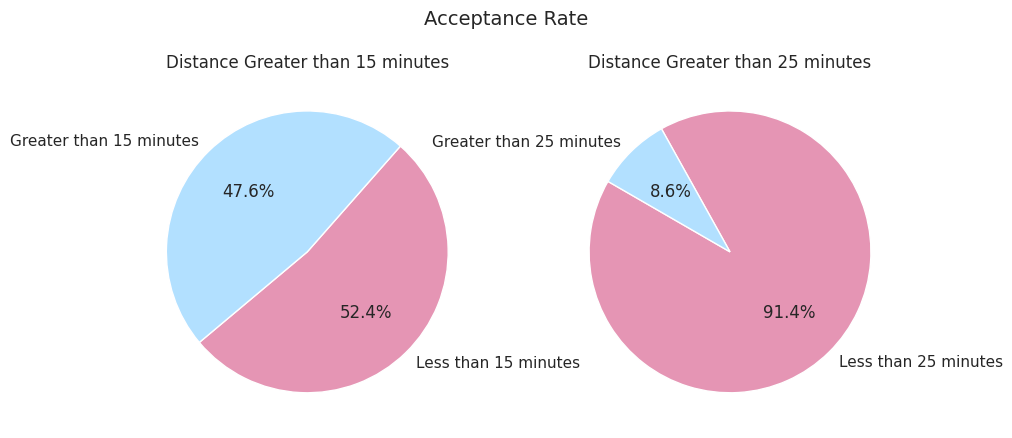

In [ ]:
acceptance_15min = data[data['Y'] == 1]['toCoupon_GEQ15min'].value_counts(normalize=True) * 100
acceptance_25min = data[data['Y'] == 1]['toCoupon_GEQ25min'].value_counts(normalize=True) * 100

labels_15min = ['Less than 15 minutes', 'Greater than 15 minutes']

labels_25min = ['Less than 25 minutes', 'Greater than 25 minutes']

plt.figure(figsize=(10, 5))
plt.suptitle('Acceptance Rate', fontsize=14)
plt.subplot(1, 2, 1)
plt.pie(acceptance_15min, labels=labels_15min, autopct='%1.1f%%', startangle=220,colors=['#e595b4','#b2e0ff'])
plt.title('Distance Greater than 15 minutes', fontsize=12)

plt.subplot(1, 2, 2)
plt.pie(acceptance_25min, labels=labels_25min, autopct='%1.1f%%', startangle=150,colors=['#e595b4','#b2e0ff'])
plt.title('Distance Greater than 25 minutes', fontsize=12)

plt.show()

**Insights:**
> * The Acceptance rate for the coupon that need **less than 15min** to reach its distination is **slighlty higher** than the one that need more
* There's a **noticable difference** between the acceptance rate for the coupons than need **less than 25min to reach and which need more**

*(Which lead us to suggest offering the coupons for the driver which will reach the coupon distination after **about 15min to 25min** but not more than that as they may lost there interest)*

## Coupon Features

***Which coupons have higher/lower acceptance rates?***


* **Which coupon Type have the higher acceptance percent**

In [ ]:
coupon_counts = data.groupby(['coupon', 'Y']).size().unstack()
coupon_counts['acceptance_percent'] = (coupon_counts[1] / coupon_counts.sum(axis=1)) * 100
coupon_counts=coupon_counts.sort_values(by='acceptance_percent', ascending=False)
coupon_counts

Y,0,1,acceptance_percent
coupon,,,
Carry out & Take away,624,1720,73.378840
Restaurant(<20),812,1967,70.780856
Coffee House,2000,1989,49.862121
Restaurant(20-50),831,657,44.153226
Bar,1186,824,40.995025


* **Does sooner expiration date have more acceptance chance?**

In [ ]:
expiration_counts = data.groupby(['expiration', 'Y']).size().unstack(fill_value=0)
expiration_counts['acceptance_percent'] = (expiration_counts[1] / expiration_counts.sum(axis=1)) * 100
expiration_counts

Y,0,1,acceptance_percent
expiration,,,
1d,2641,4390,62.437776
2h,2812,2767,49.596702


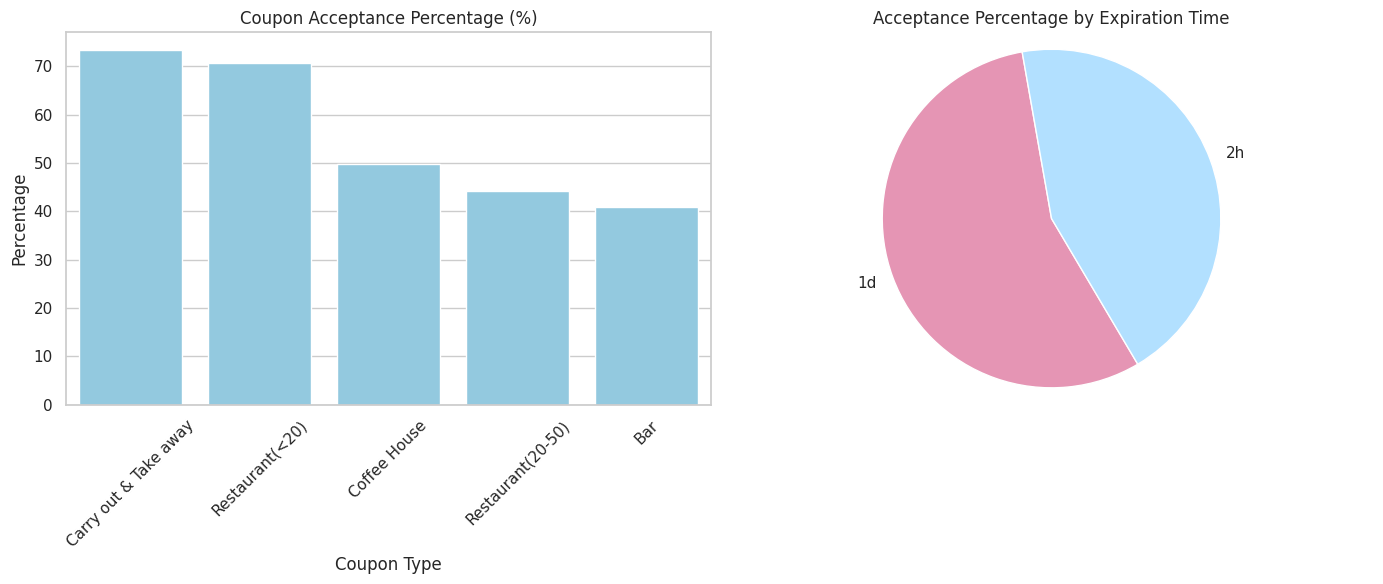

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
sns.barplot(x=coupon_counts.index, y=coupon_counts['acceptance_percent'], color='skyblue', ax=axes[0])
axes[0].set_xlabel('Coupon Type')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Coupon Acceptance Percentage (%)')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(expiration_counts['acceptance_percent'], labels=expiration_counts.index,
            startangle=100, colors=['#e595b4','#b2e0ff'])
axes[1].set_title('Acceptance Percentage by Expiration Time')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

**Insights:**
> - The **"Carry out & Take away"** coupons have the higher acceptance percents **(73.379%)** followed by the **"Resturant with average less than 20$"** with **(70.780%)**
> - The coupons with **sooner expiration** date (in 2 hours duration) have acceptance percent **lower by (12.841%)** than the coupons expires in 1 day duration

## Feature Relations

* **Check the relation between the data features based on "cramer's V correlation" as it's more appropriate for categorical featuers**

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))



categorical_columns = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Calculate Cramér's V for each pair of categorical features
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in range(len(categorical_columns)):
    for j in range(i, len(categorical_columns)):
        feature1 = categorical_columns[i]
        feature2 = categorical_columns[j]
        correlation = cramers_v(data[feature1], data[feature2])
        correlation_matrix.loc[feature1, feature2] = correlation
        correlation_matrix.loc[feature2, feature1] = correlation

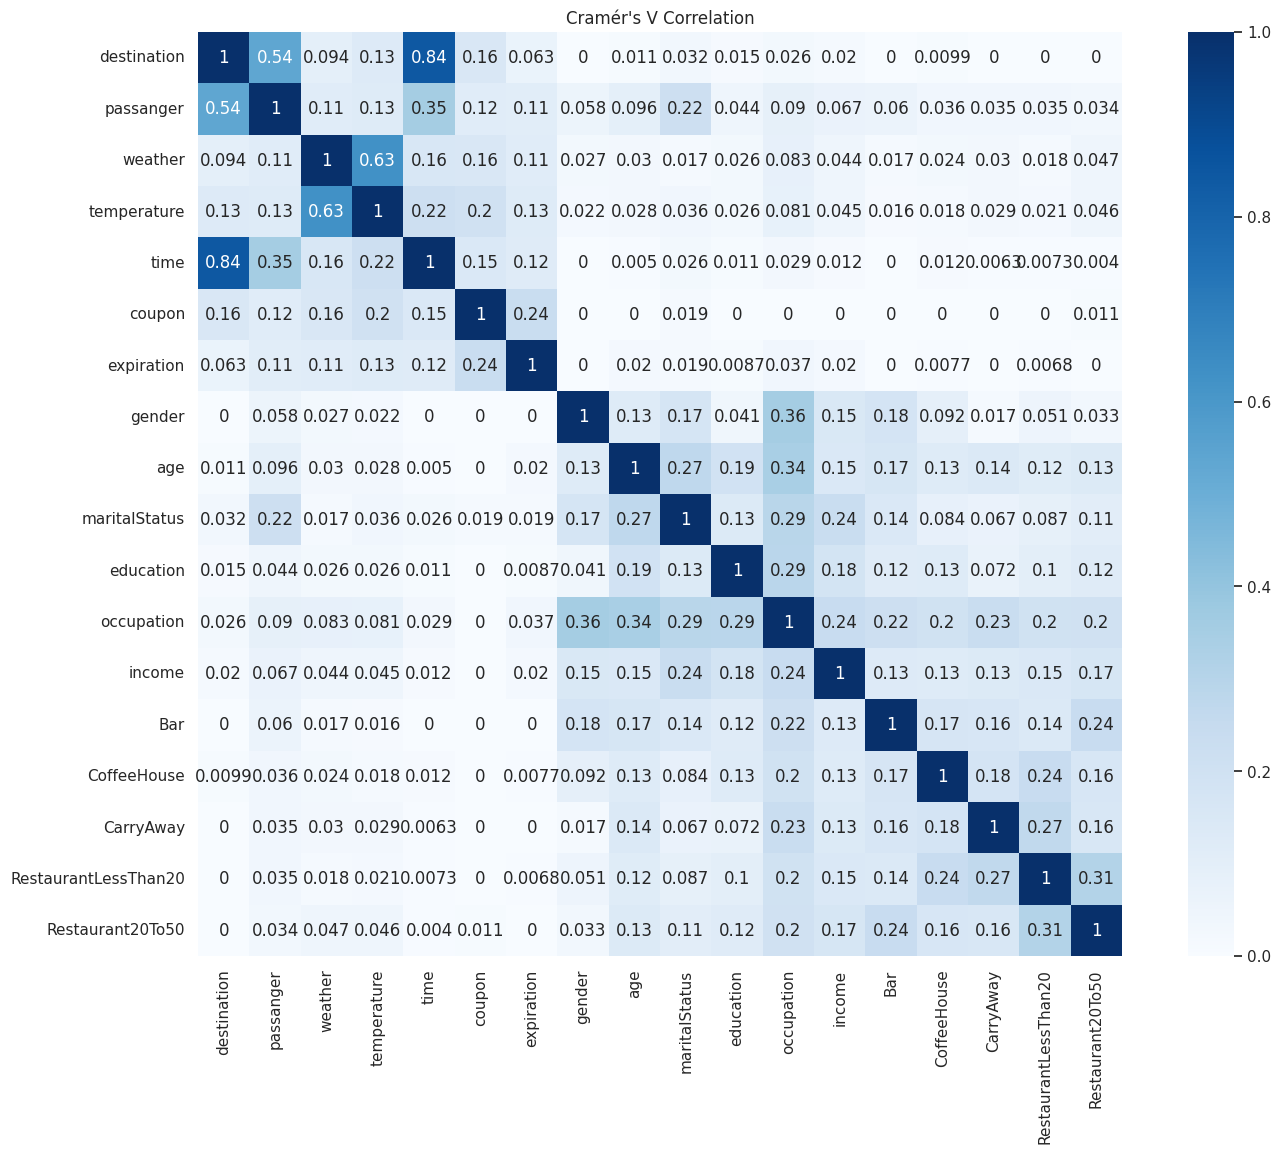

In [ ]:
plt.figure(figsize=(17, 12))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='Blues', square=True)
plt.title("Cramér's V Correlation")
plt.show()

**Insights:**
> * Using Cramér's V Correlation which ranges the associations from [0,1] it's noticable that:
    - There's a strong association between **"time", "distination" (0.84)**
    - There's also a strong association between **"tempareture", "weather" (0.63)**
    - There's an average association between **"passenger","distination" (0.54)**
    - There's a week association **"passenger","time" (0.35)**

> * To avoid the collinearity issues we will drop some of these features based on the correlation values and EDA results

In [ ]:
data.drop(columns=['destination'], inplace=True)
data.drop(columns=['temperature'], inplace=True)

> * The **distination** is dropped as it was highly correlated to both **"time" and "passenger"**
* The **temperature** was dropped as the **weather** may hold **more valuable information** for the model

# Dimention Reduction

### Feature Selection

**In previous phases (Data cleaning , EDA):**
- The **car** feature which refer to the car type was ignored as more than **70%** of the feature values was **missing (null)**
- The **"toCoupon_GEQ5min"** feature was dropped a due to its low cardinality as it has **"zero variation"**
- The **"destination","temperature"** features were dropped based on the **correlation results** as they had strong association with another feature to prevent the collinearity issue.

* **Encode the data features to be used in feature selection and extraction models**

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['expiration'] = LabelEncoder().fit_transform(data['expiration'])

In [ ]:
import pandas as pd

categorical_columns = ['passanger', 'weather', 'time', 'coupon','age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
categorical_data = data[categorical_columns]

encoded_data = pd.get_dummies(categorical_data, dtype=int)

In [ ]:
encoded_data

,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,...,CarryAway_less1,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
12680,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
12681,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
12682,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
target = data['Y']
target = pd.Series(target).astype('category')

df = ['expiration','gender','has_children','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same']
some_data = data[df]
data_encoded = pd.concat([encoded_data,some_data], axis=1)

In [ ]:
data_encoded

,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
12680,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12681,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
12682,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


* **Chi-square feature selection technique**

  *As our features are categorical and the target chi-square techique is an effecient method to use*

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

chi2_selector = SelectKBest(score_func=chi2, k=80)
chi2_features = chi2_selector.fit_transform(data_encoded, target)

selected_feature_indices = chi2_selector.get_support(indices=True)

selected_feature_names = [data_encoded.columns[i] for i in selected_feature_indices]

filter_chi2 = data_encoded[selected_feature_names]

In [ ]:
filter_chi2

,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,...,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
12680,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12681,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
12682,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


* **information gain selection technique**

  *It's also considered as suitable technique for categorical data but in later test with the SVM models the chi-square will return better results*

In [ ]:
mi_selector = SelectKBest(score_func=mutual_info_classif, k=80)
mi_features = mi_selector.fit_transform(data_encoded, target)

selected_features = mi_selector.get_support(indices=True)

selected_names = [data_encoded.columns[i] for i in selected_features]

filter_info = data_encoded[selected_names]

### Feature Extraction

* **Check the data shape in low dimention**

In [ ]:
chi2_pca = filter_chi2

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA


pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(chi2_pca)

df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Class'] = target

fig = px.scatter_3d(df_pca_3d, x='PC1', y='PC2', z='PC3', color='Class',color_discrete_sequence=['#b2e0ff','#e595b4'],
                    title='3D PCA Plot of Data', opacity=0.8)
fig.show()

**Insights:**
> * The data is not lineary seprable and the classes is subset from each other.

*(Based on this insight the suitable feature extraction is **MCA** which is appropiate for **categorical features and nonlinear** relations as the PCA and LDA  won't be efficient)*

In [ ]:
pip install prince

In [ ]:
pip install MCA

* **Using MCA method**

**Select the suitable number of component based on the discribed variation (at least 90%)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from prince import MCA

In [ ]:
mca = MCA(n_components=filter_chi2.shape[1])
mca.fit(filter_chi2)

explained_variance_ratio = mca.eigenvalues_ / np.sum(mca.eigenvalues_)
cumulative_explained_inertia = np.cumsum(explained_variance_ratio)

variance_threshold = 0.90

n_components_above_threshold = np.argmax(cumulative_explained_inertia >= variance_threshold) + 1
n_components_above_threshold

55

In [ ]:
mca = MCA(n_components=55)
mca.fit(filter_chi2)

reduced_data = mca.transform(filter_chi2)
reduced_data['Class'] = target

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(reduced_data.drop(columns=['Class']), reduced_data['Class'])
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.004004802194604539


**Insights:**
> * The classes are **overlapped and mostly still nonlinear** in the new dimention which lead us to use **the kernel SVM**

#SVM Model

**The "rbf" kernel function will be used as it's the most suitable function for the overlapped classes and nonlinear relations**

### Hyperparameter Tuning

> To **tune the hyperparameters** for the rbf function **"gamma"** and the **reguralization parameter "c"** the **grid search and random search** techniques can be used. <br><br>
  **In our case we used the random search as it's less comptationaly expenssive and need less time to return its output**


**Tuning process:**


1.   We started with a **wide range** for both parameters **"c","gamma":** <br>
        `param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}`
        <br>`Best model : {'gamma' : 1, 'C' : 10 }`
        <br>`Accuracy: 0.747`
      * The best model was given by **greater c and smaller gamma values**

2.   Narrow the range of the parameters with larger values for c and smaller for gamma <br>
  `param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 10]}`
      <br>`Best model : {'gamma' : 0.1, 'C' : 10 }`
      <br>`Accuracy: 0.71`
  * The model **improved** and also choosen **greater c and smaller gamma values**
3. Narrowing the ranges again with smaller range

    `param_grid = {'C': [1, 5, 10,15], 'gamma': [0.01, 0.1, 1, 5]}`
      <br>`Best model : {'gamma' : 1, 'C' : 15 }`
      <br>`Accuracy: 0.745`
    * The model **improved** and also choosen **greater c and smaller gamma values**

4. As the difference between is still large, different range will be checked to avoid overfitted model <br>
`param_grid = {'C': [5, 10, 15, 20], 'gamma': [0.1, 1, 5, 10]}`
      <br>`Best model : {'gamma' : 1, 'C' : 5 }`
      <br>`Accuracy: 0.7446`
  * The model gives **high and relatively good performance** comapared to previuos results and the values of **c and gamma isn't extremely different**


* **The SVM model will be build with c=5 and gamma=1**


In [ ]:
'''
X_train, X_test, y_train, y_test = train_test_split(reduced_data.drop(columns=['Class']), reduced_data['Class'], test_size=0.2, random_state=42)

svm = SVC(kernel='rbf')

param_grid = {'C': [5, 10, 15, 20], 'gamma': [0.1, 1, 5, 10]}

# Random Search
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters (Random Search):", best_params_random)
print("Accuracy:", accuracy)
'''

'\nX_train, X_test, y_train, y_test = train_test_split(reduced_data.drop(columns=[\'Class\']), reduced_data[\'Class\'], test_size=0.2, random_state=42)\n\nsvm = SVC(kernel=\'rbf\')\n\nparam_grid = {\'C\': [5, 10, 15, 20], \'gamma\': [0.1, 1, 5, 10]}\n\n# Random Search\nrandom_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=5)\nrandom_search.fit(X_train, y_train)\nbest_params_random = random_search.best_params_\n\nbest_model = random_search.best_estimator_\ny_pred = best_model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\n\nprint("Best Parameters (Random Search):", best_params_random)\nprint("Accuracy:", accuracy)\n'

### Building the SVM model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data.drop(columns=['Class']), reduced_data['Class'], test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', C=5 , gamma=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7446471054718478

### Model Evaluation

* **Calculate evaluation metrices**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1106
           1       0.76      0.80      0.78      1416

    accuracy                           0.74      2522
   macro avg       0.74      0.74      0.74      2522
weighted avg       0.74      0.74      0.74      2522



**Insights**
> The SVM model is relatively good with **(74.4671%) accuracy**

> **Precision:**
  * prediction of instance belonging to **class 1, it is correct 76% of the time**
  * prediction of instance belonging to **class 0, it is correct 72% of the time**
  
> **Recall:**
  * Out of all the instances that actually belong to **class 0, the model correctly identifies 67% of them.**
  * And **identify 80%** Out of all the instances that actually belong to **class 1**

> **F1-score:**
  * F1-score of **0.78** indicate that the model's performance in correctly identifying instances of class 1 is relatively better compared to class 0 **(0.70)**.
  * Implying that the model is **better at identifying positive cases** compared to negative ones.

* **Create The ROC for the model**

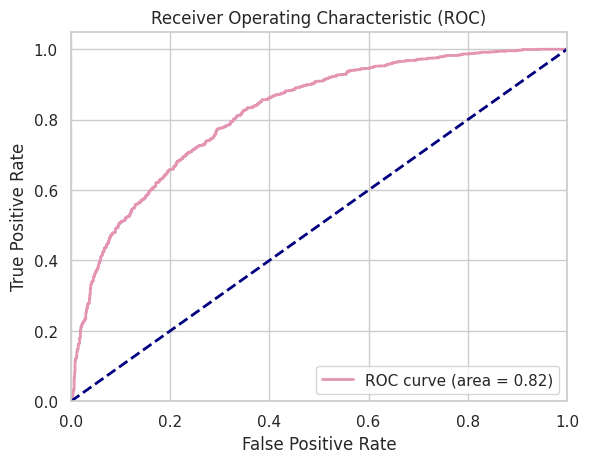

In [ ]:
from sklearn.metrics import roc_curve, auc
y_scores = svm.decision_function(X_test) # calc the y_scores instead of the y_pred

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#e595b4', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Insights**
> the **0.82 area under the curve** suggests that the model is **doing a better job of telling positive cases apart from negative cases**. which was also detected from the f1-score results.<br>
*(Simply, when the model says something is positive, it's usually right.)*

* **Confusion Matrix**

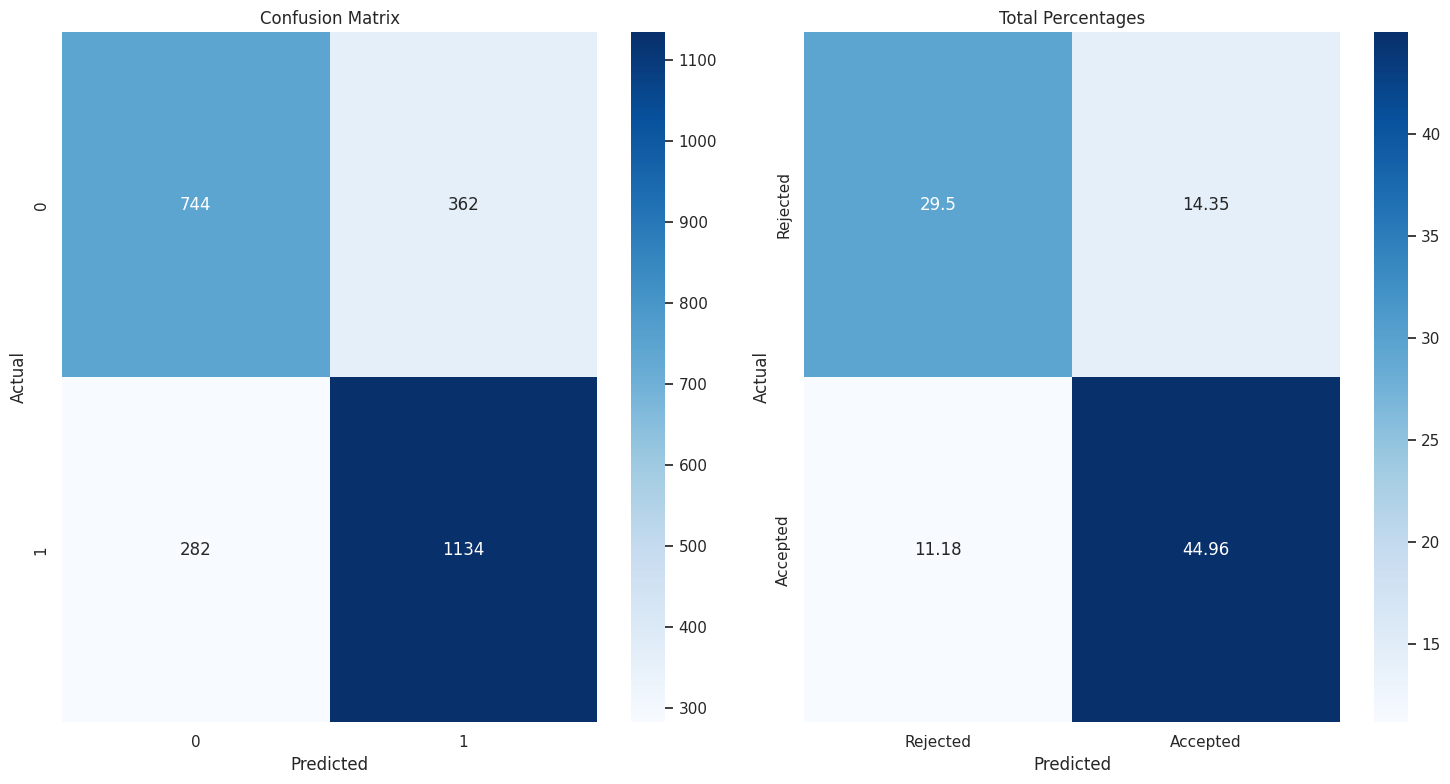

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

cm_SVM = confusion_matrix(y_test, y_pred)

total_values = np.sum(cm_SVM)
cm_percentage = np.round(cm_SVM / total_values * 100, 2)

cm_df = pd.DataFrame(cm_percentage, index=['Rejected', 'Accepted'], columns=['Rejected', 'Accepted'])

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.heatmap(cm_SVM, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Total Percentages')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

**Insights:**
> * The **worst case** in our case is when the model **predict that the driver will consume the coupon and he actually want.** <br>
The model should **minimize that case**, during the fine tuning reltively good hyperparameters was checked with the SVM. and the **results was minimized to (362 which is 14.35% from all predictions) after (423,411,410) results**

> * When the model predict that the coupon **won't be consumed but it actaully would it's still cosider and lost profit** for the company but **won't have the same affect as the previuos case.** and this case is only **(11.18%)** from all our model's prediction.